In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [4]:
#주피터 노트북에서 실행하는 경우 데이터 불러오기
train = pd.read_csv('data/train.csv', index_col='id')

In [ ]:
# 콜랩에서 실행하는 경우 mount
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#콜랩에서 실행하는 경우 데이터 불러오기
train = pd.read_csv('/content/drive/My Drive/DACON/data/ybigta_sdss_train.csv')

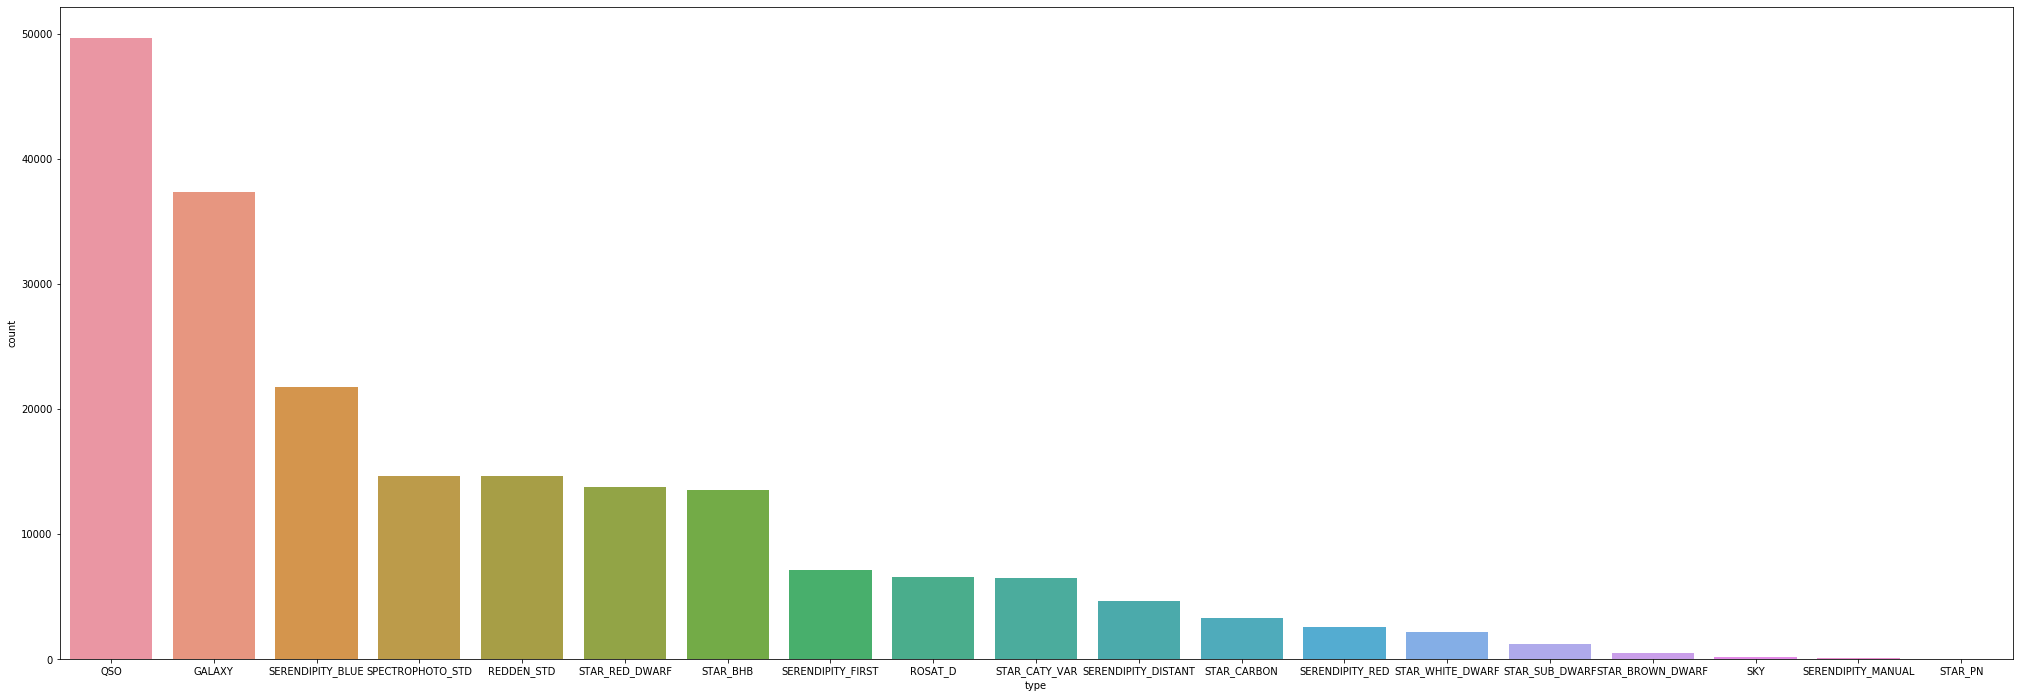

In [6]:
#Countplot
#매우 asymmetric하다. QSO가 가장많고 뒤에 3개는 거의 안보인다.
plt.figure(figsize=(35,12))
sns.countplot(x = 'type', data = train, order = train['type'].value_counts().index)  

(21.0, 0.0)

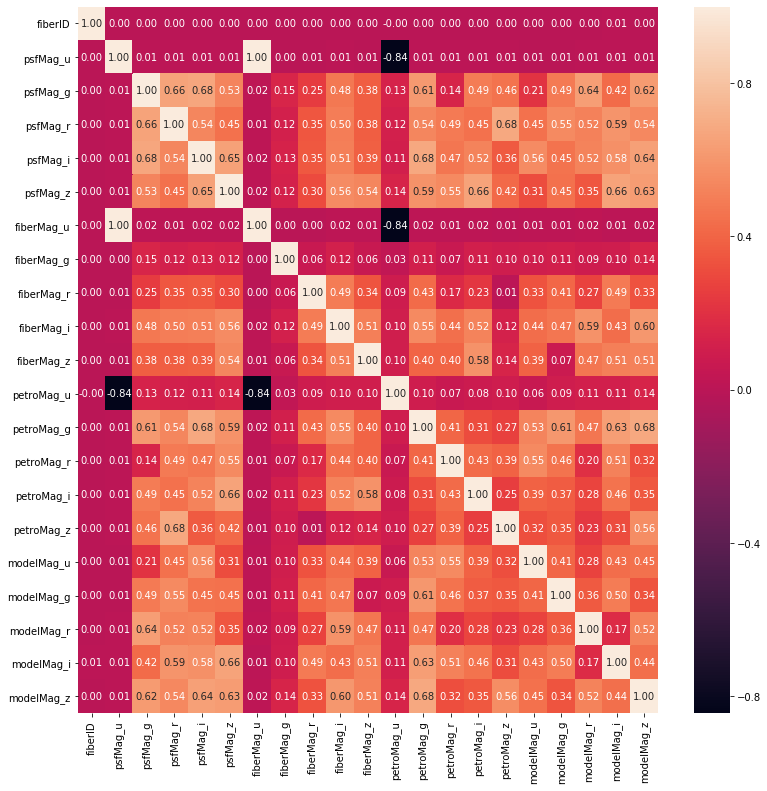

In [5]:
#HeatMap
plt.subplots(figsize=(13,13))

ax = sns.heatmap(data=train.corr(),annot=True,fmt='.2f')
buttom,top = ax.get_ylim()
ax.set_ylim(buttom+0.5,top-0.5)

#큰 상관관계는 없어보이지만 psgMag_u와 petroMag_u, 그리고 fiberMag_u와 petroMag_u 사이에는 강한 상관관계가 존재함을 찾아볼 수 있다.
#또한 psfMag_u와 fiberMag_u는 상관관계가 완벽하게 1로 떨어진다.

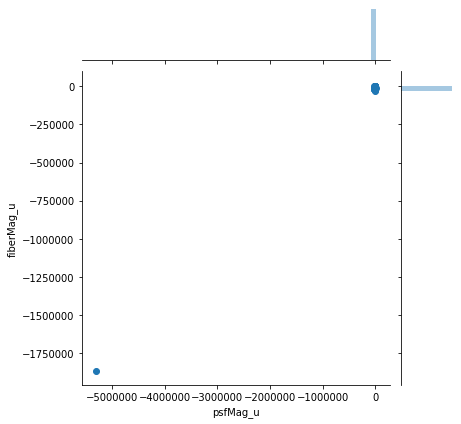

In [10]:
#jointplot
#다중공선성의 문제 때문에 둘 중 하나는 삭제하는 게 나을것 같다, 데이터가 거의 동일하다
sns.jointplot(x = 'psfMag_u', y = 'fiberMag_u', data = train) 

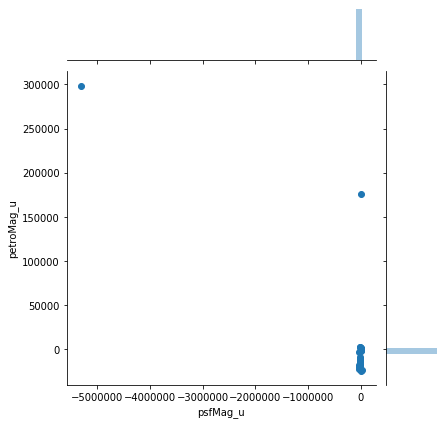

In [11]:
#jointplot
#얘네도 삭제하는 게 낫지않나 싶다
sns.jointplot(x = 'psfMag_u', y = 'petroMag_u', data = train)

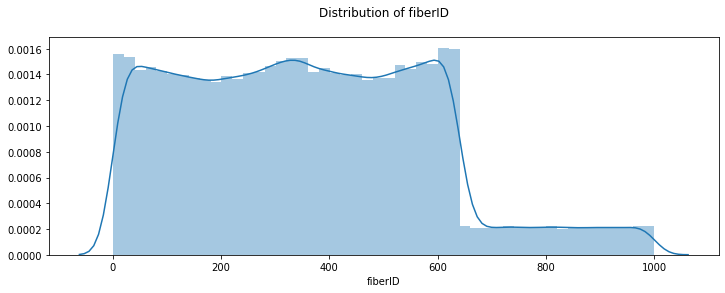

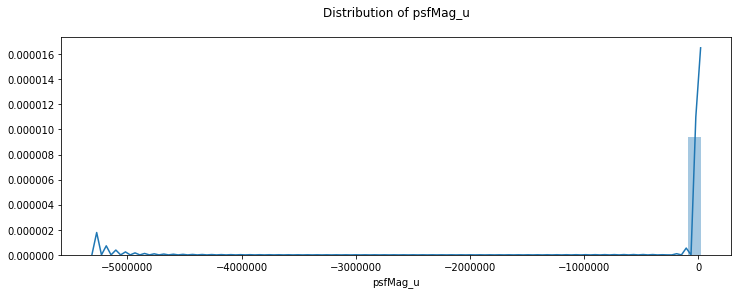

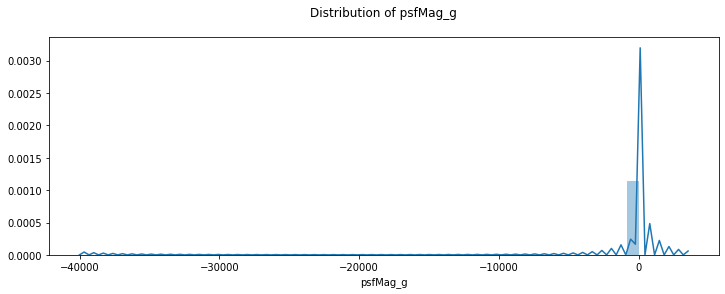

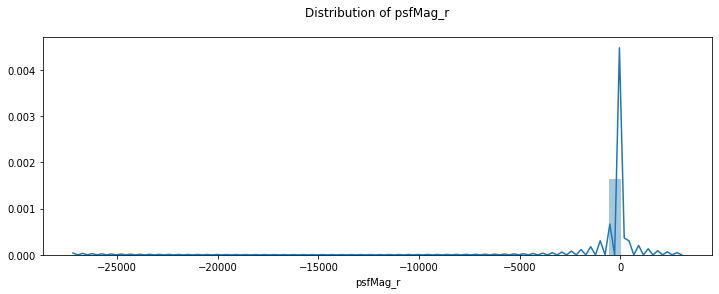

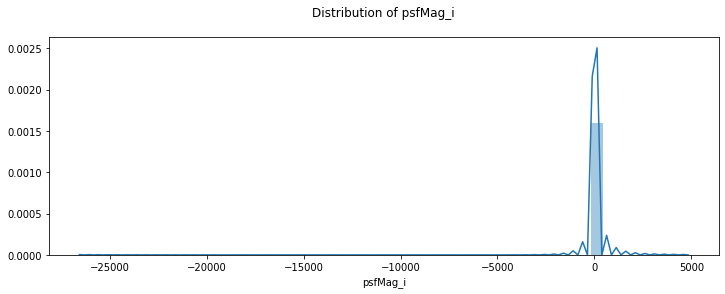

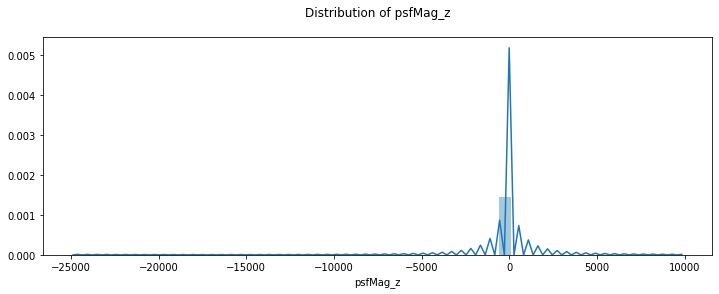

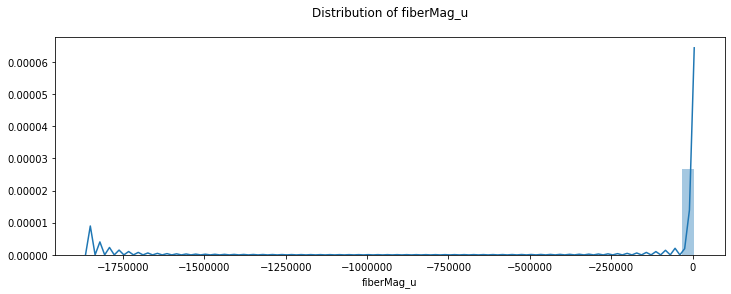

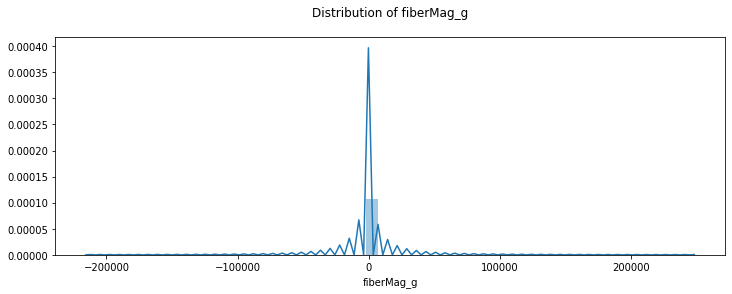

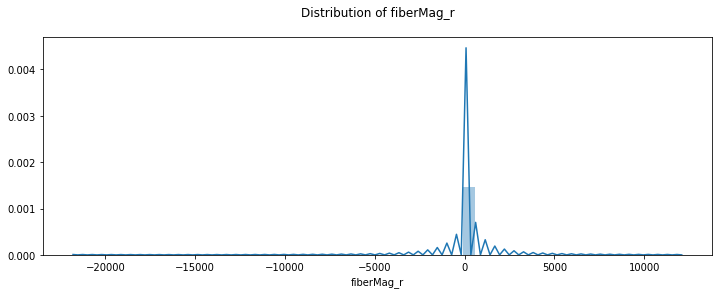

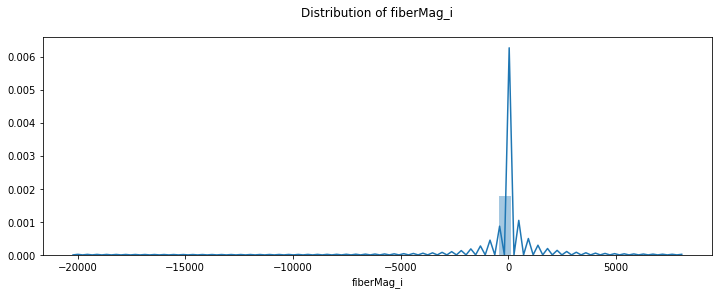

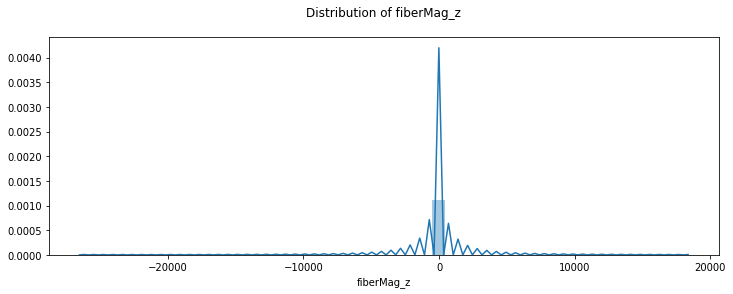

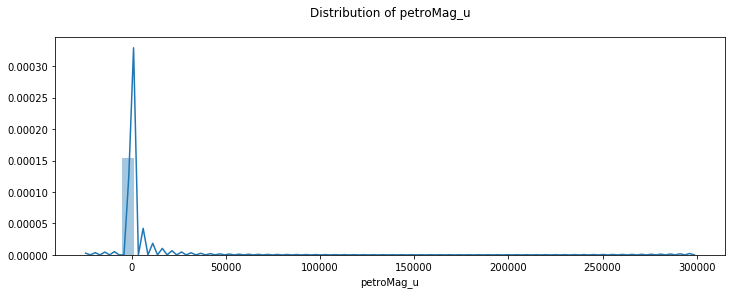

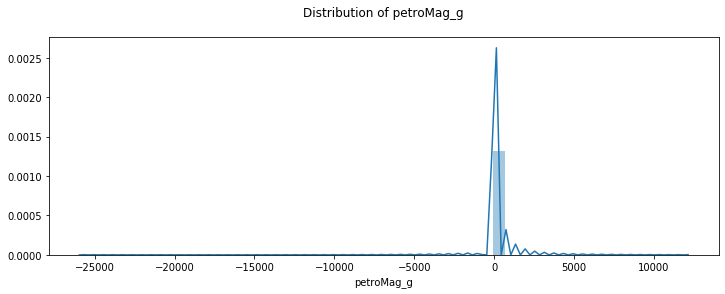

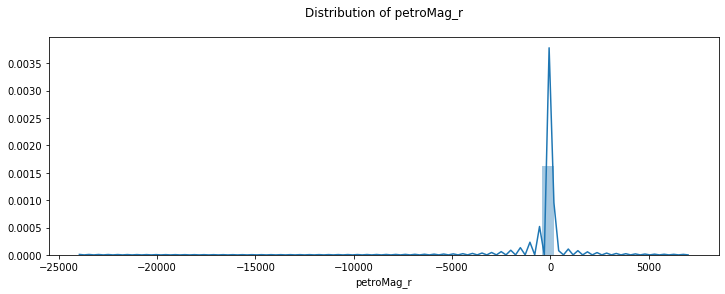

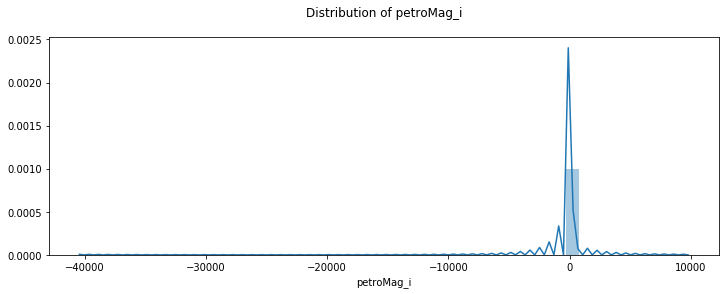

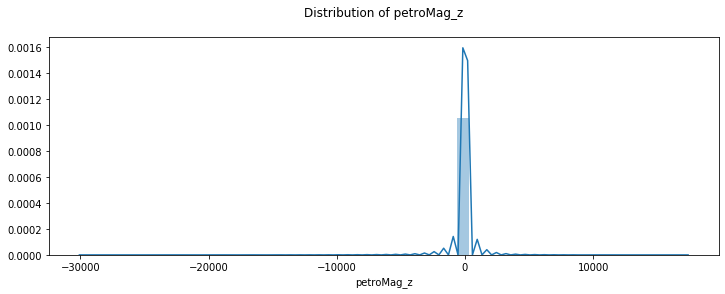

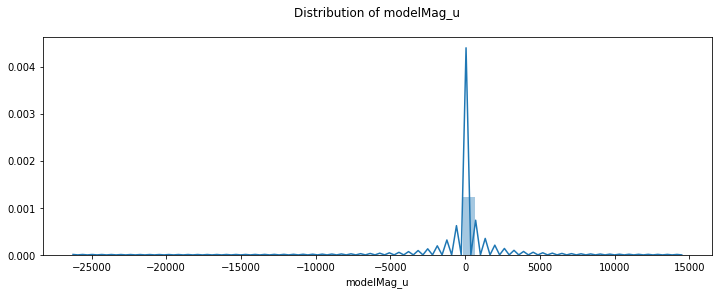

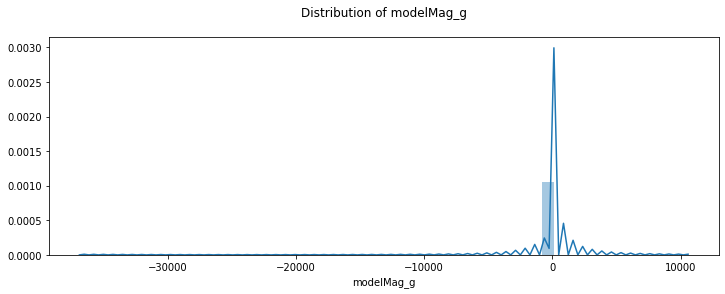

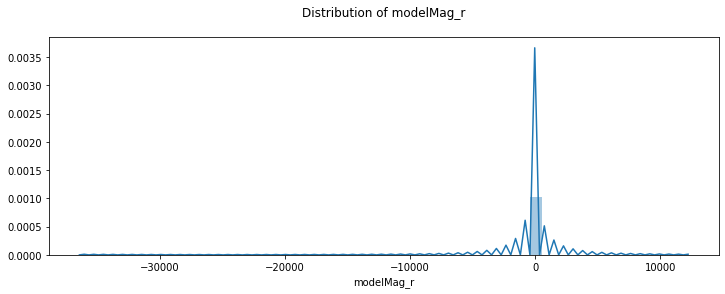

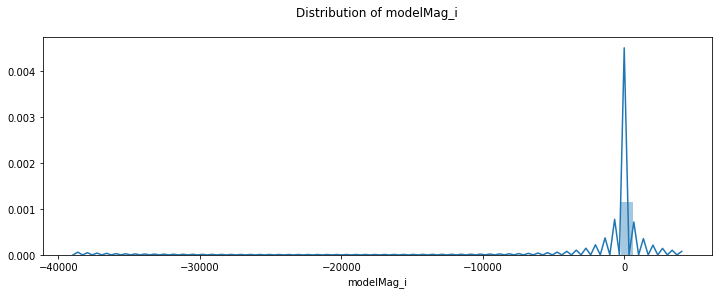

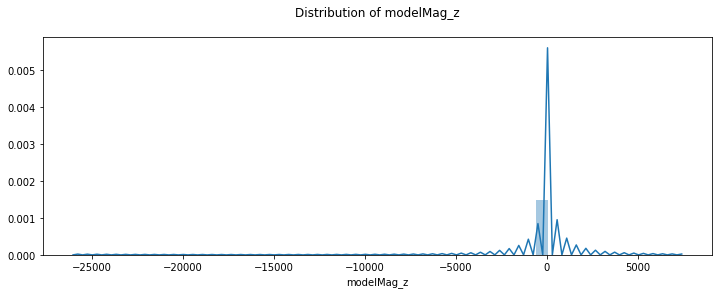

In [11]:
#Distribution 확인
features = train.columns[1:]
for col in features :
    plt.figure(figsize=(12,4))
    sns.distplot(train[col])
    plt.title('Distribution of %s\n'%col)

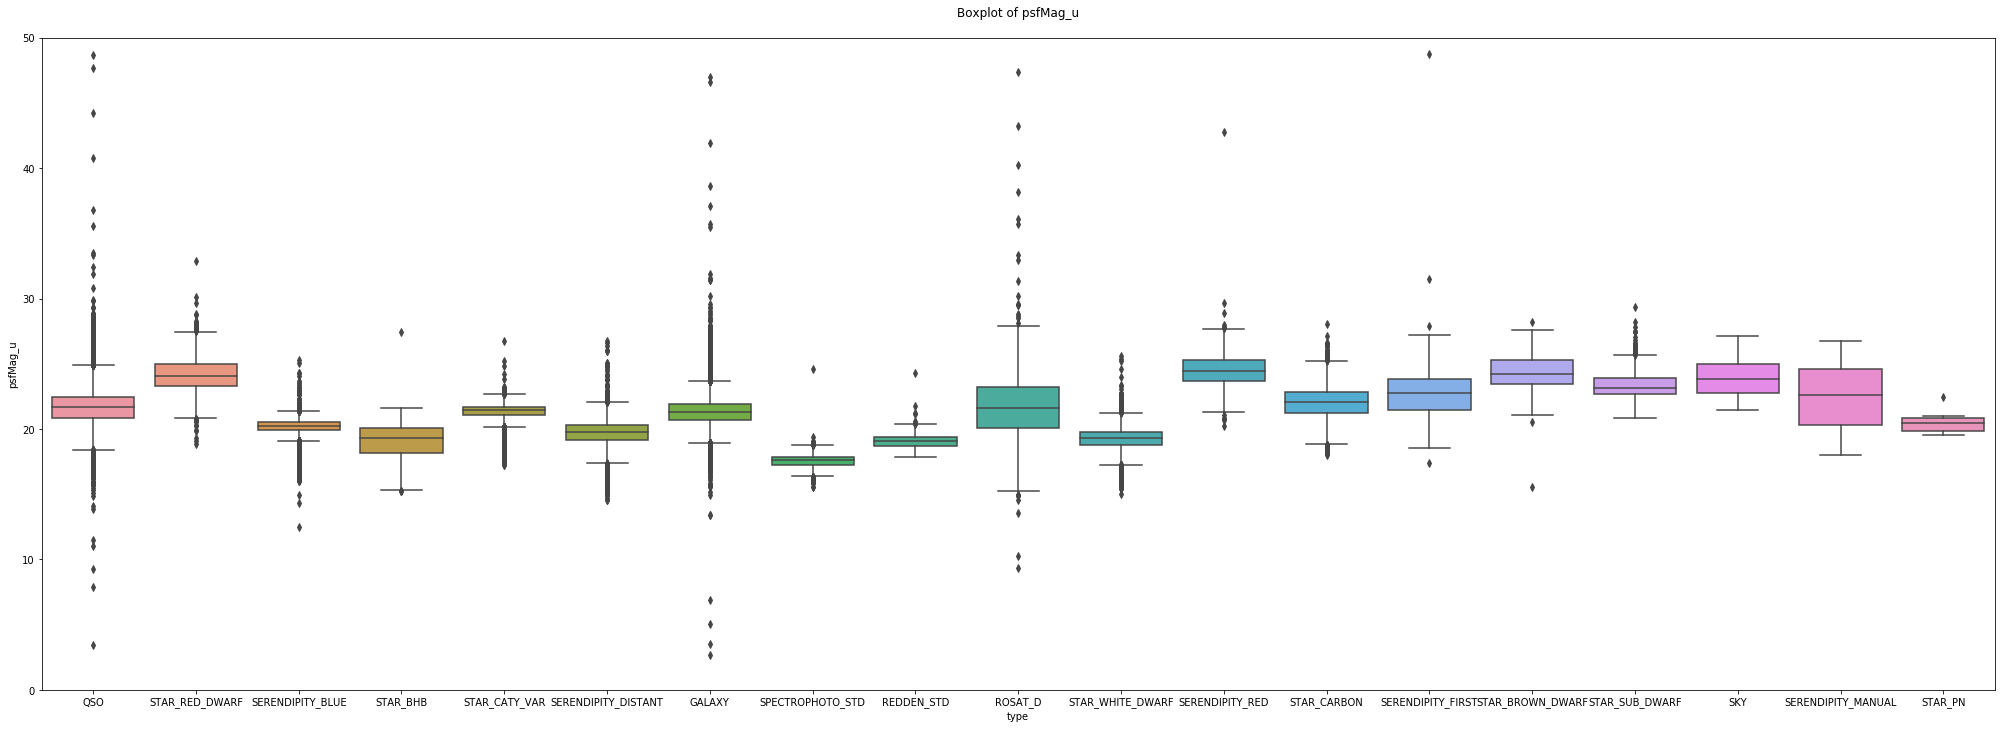

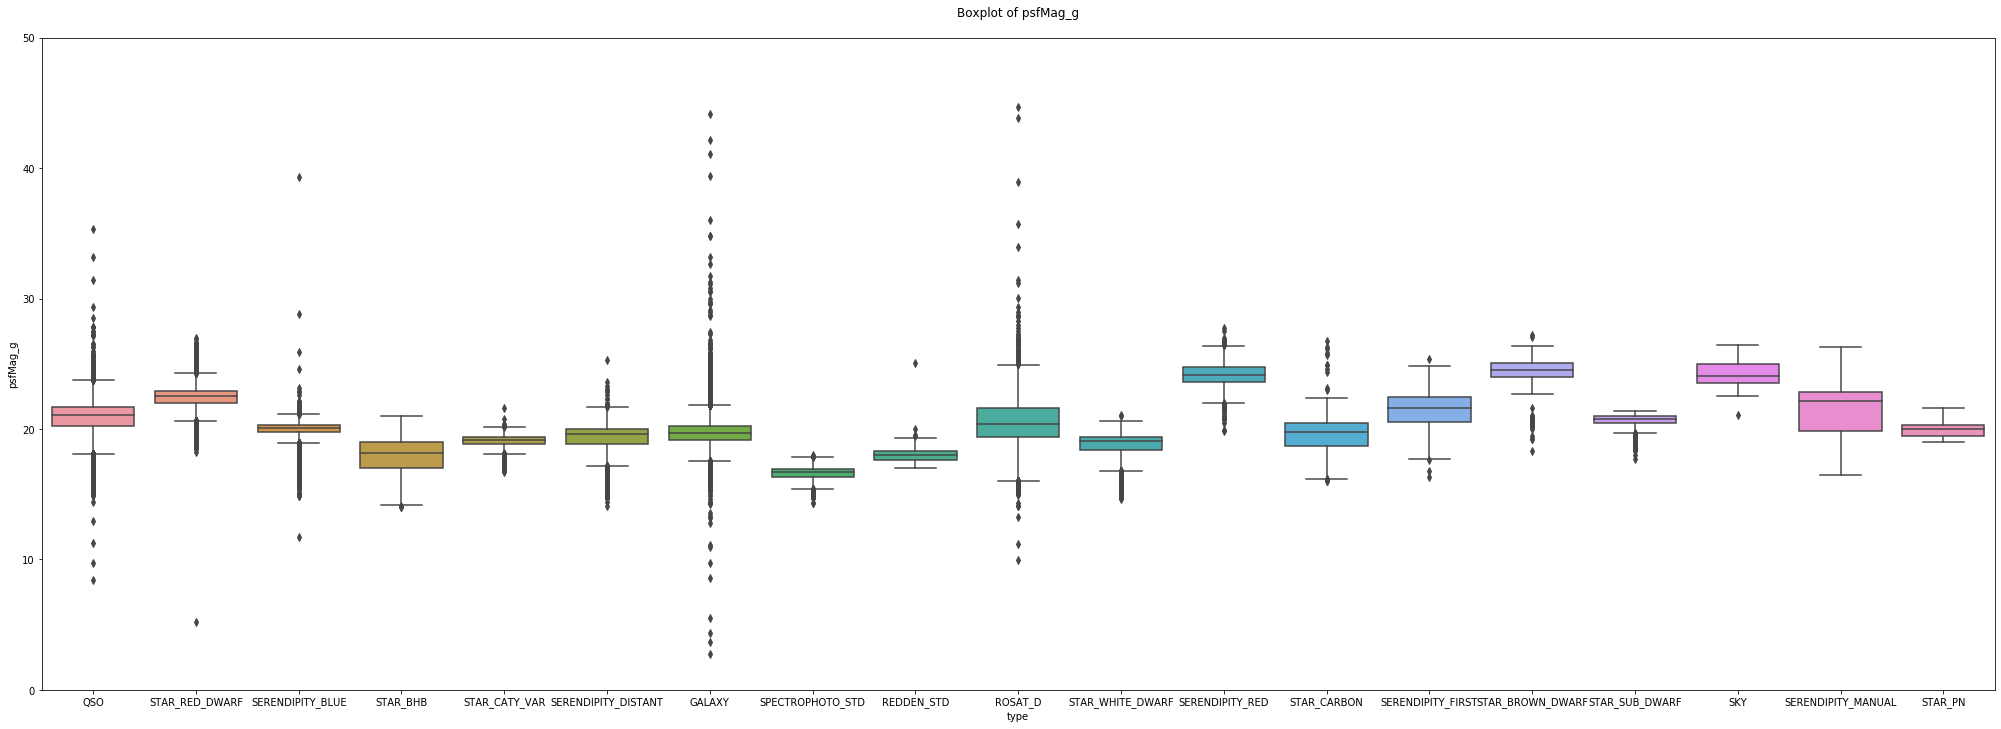

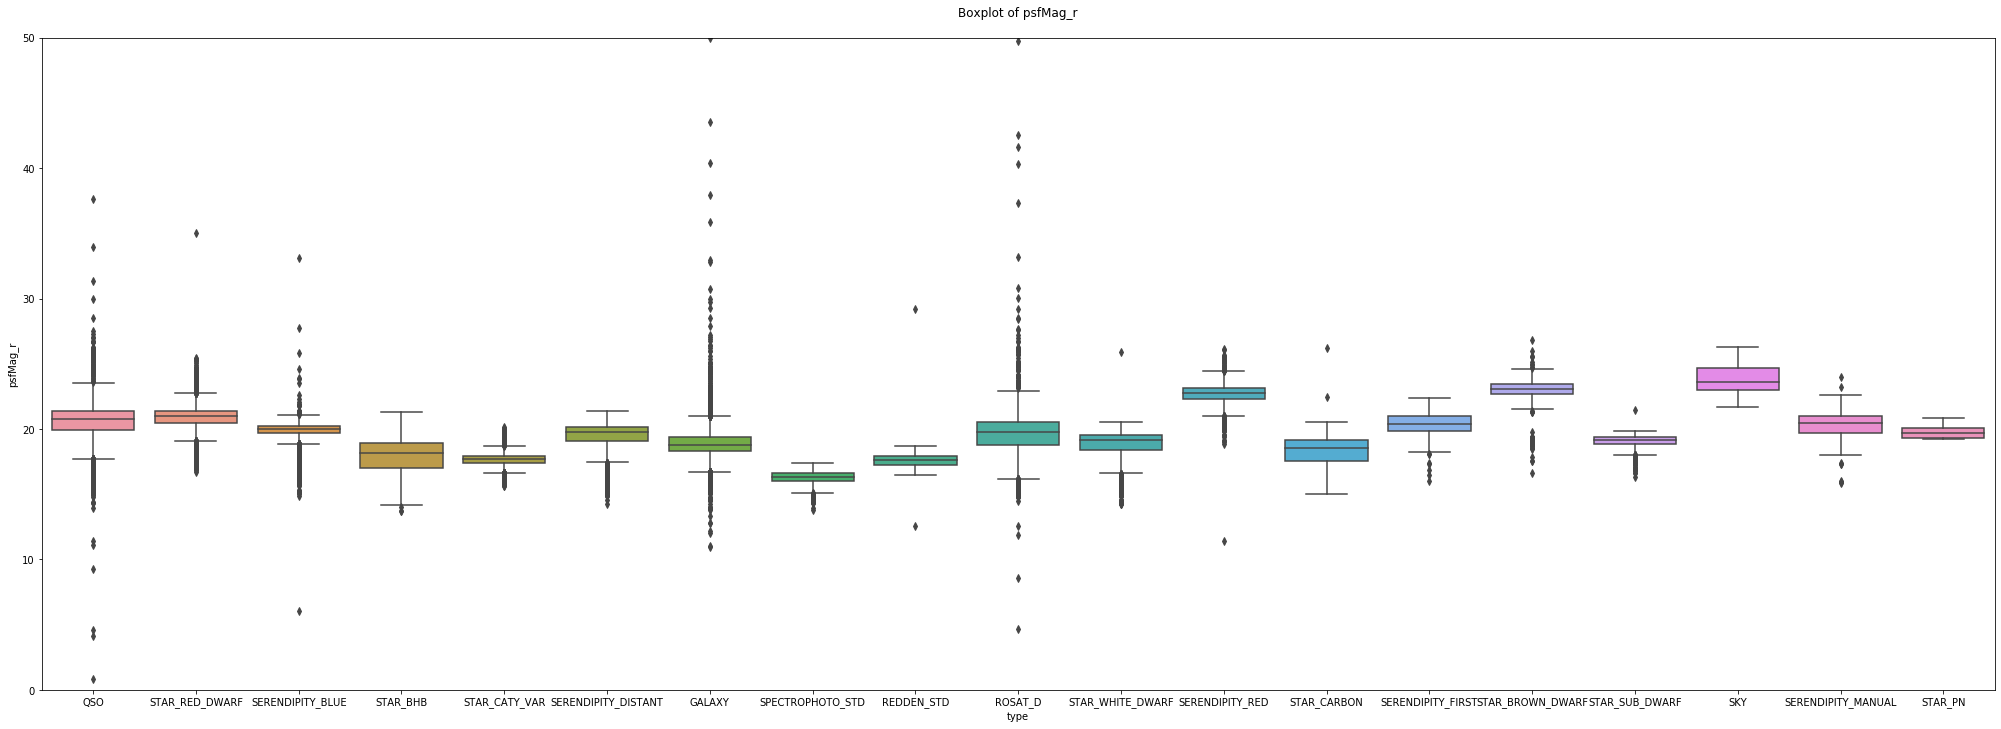

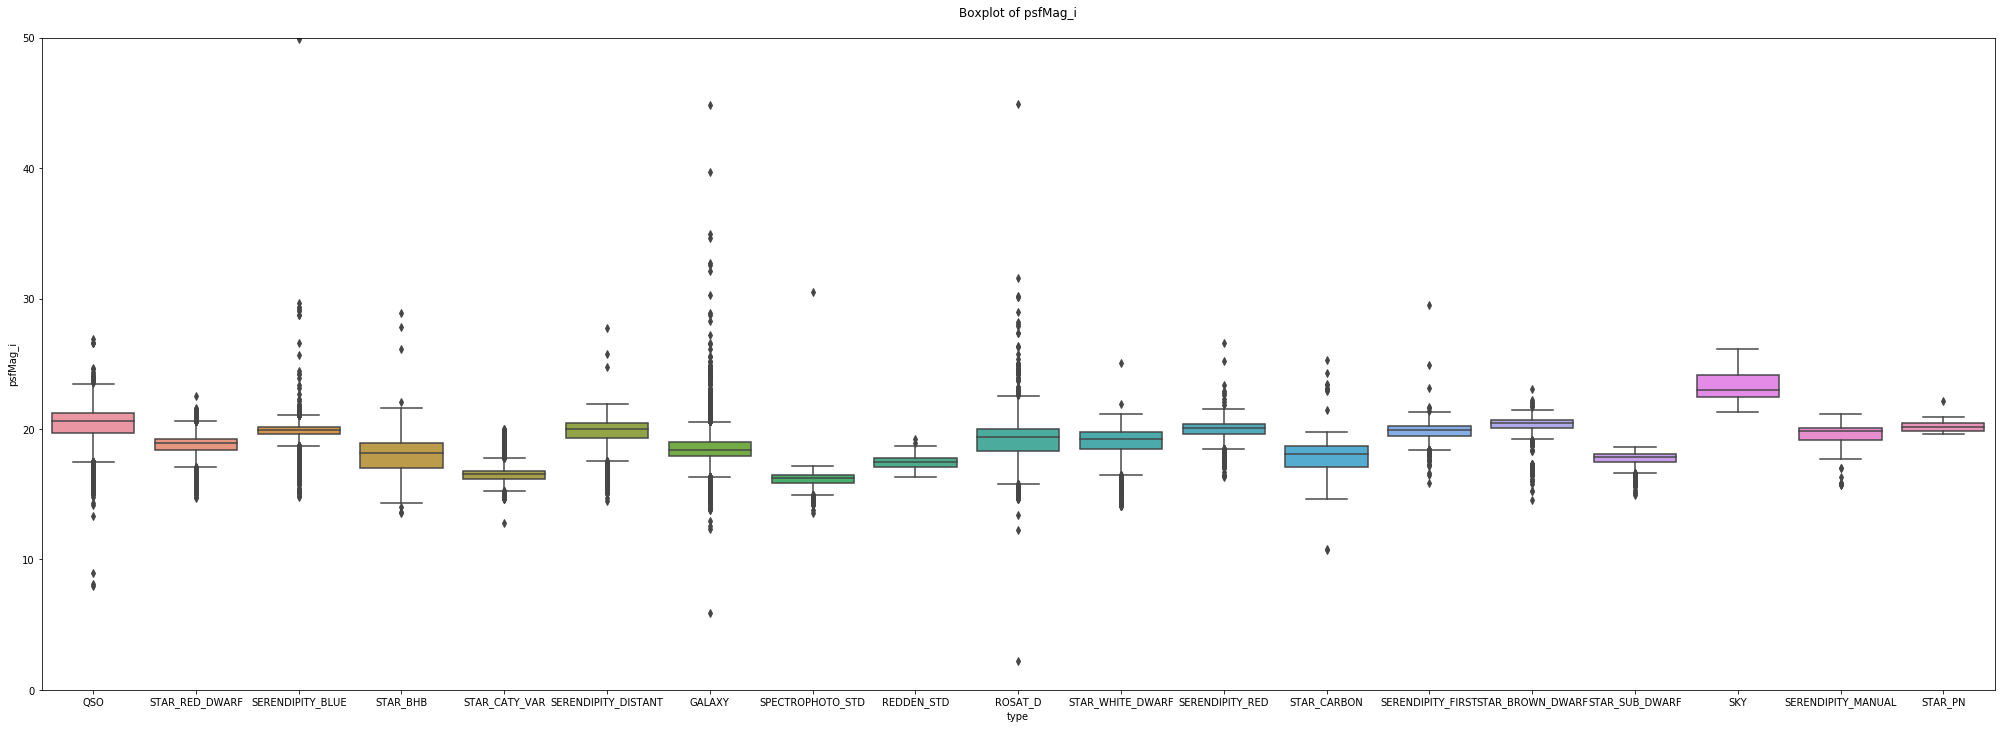

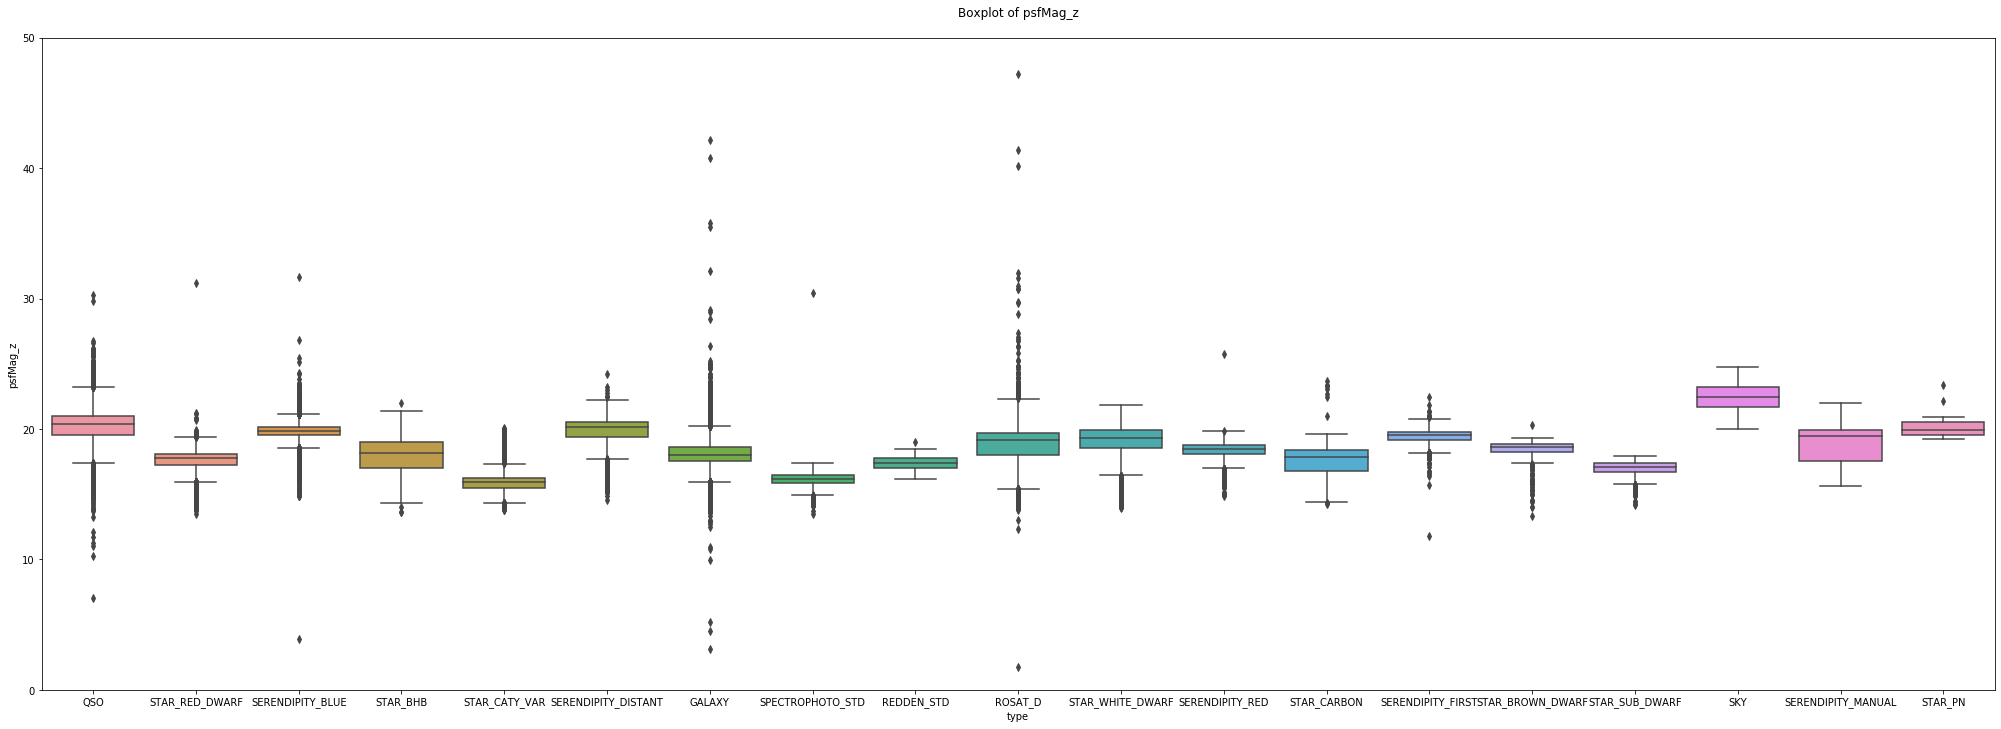

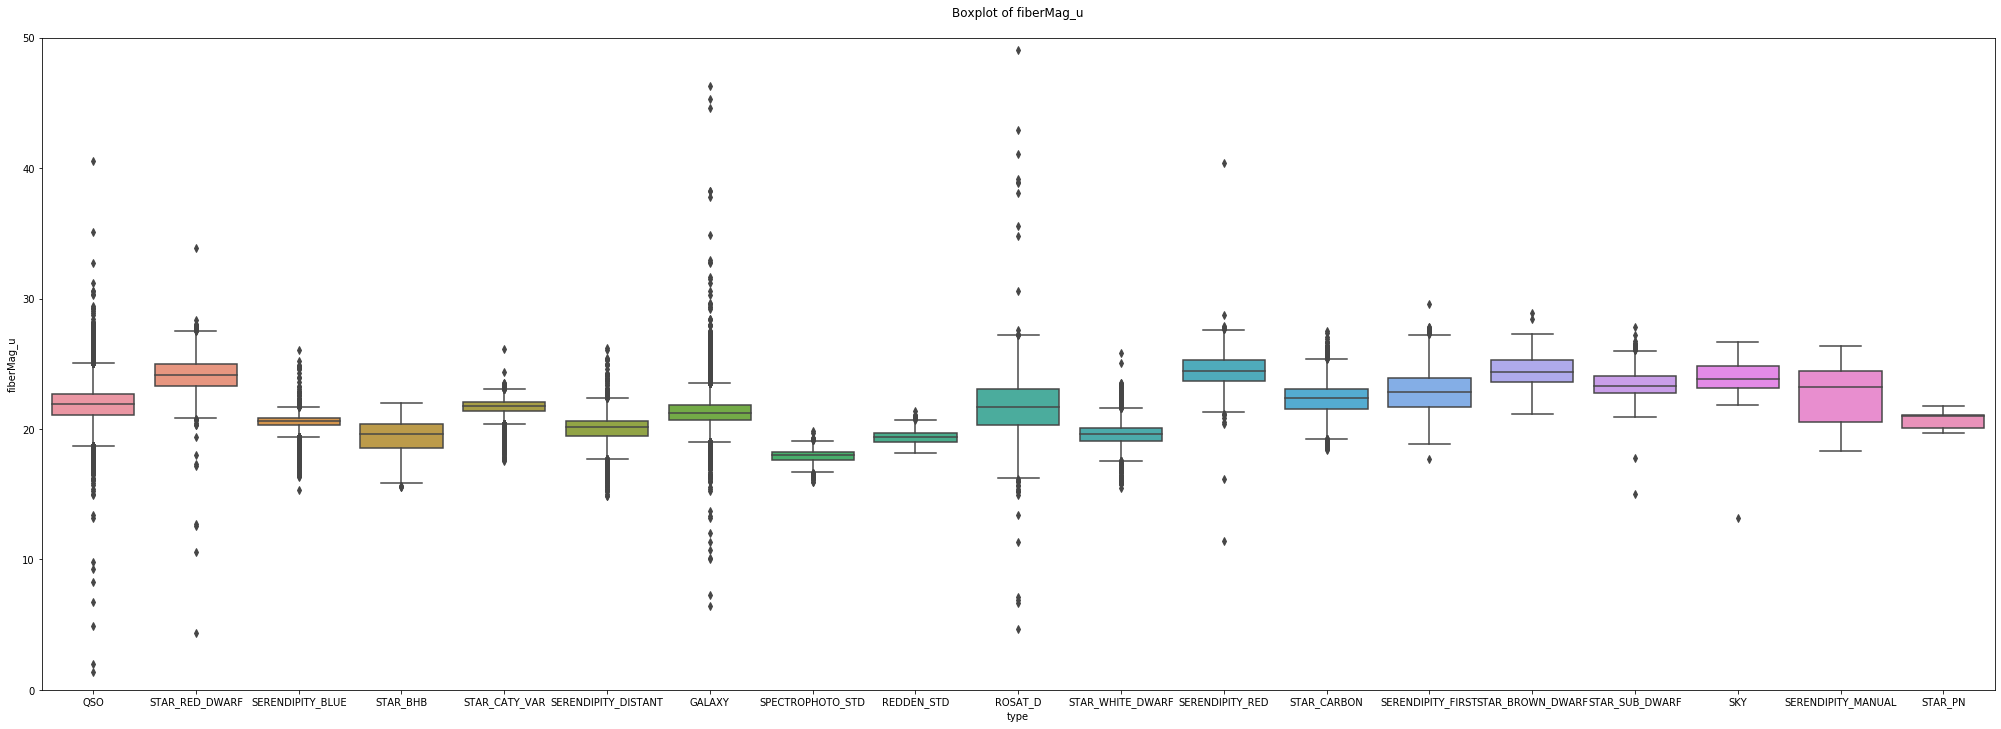

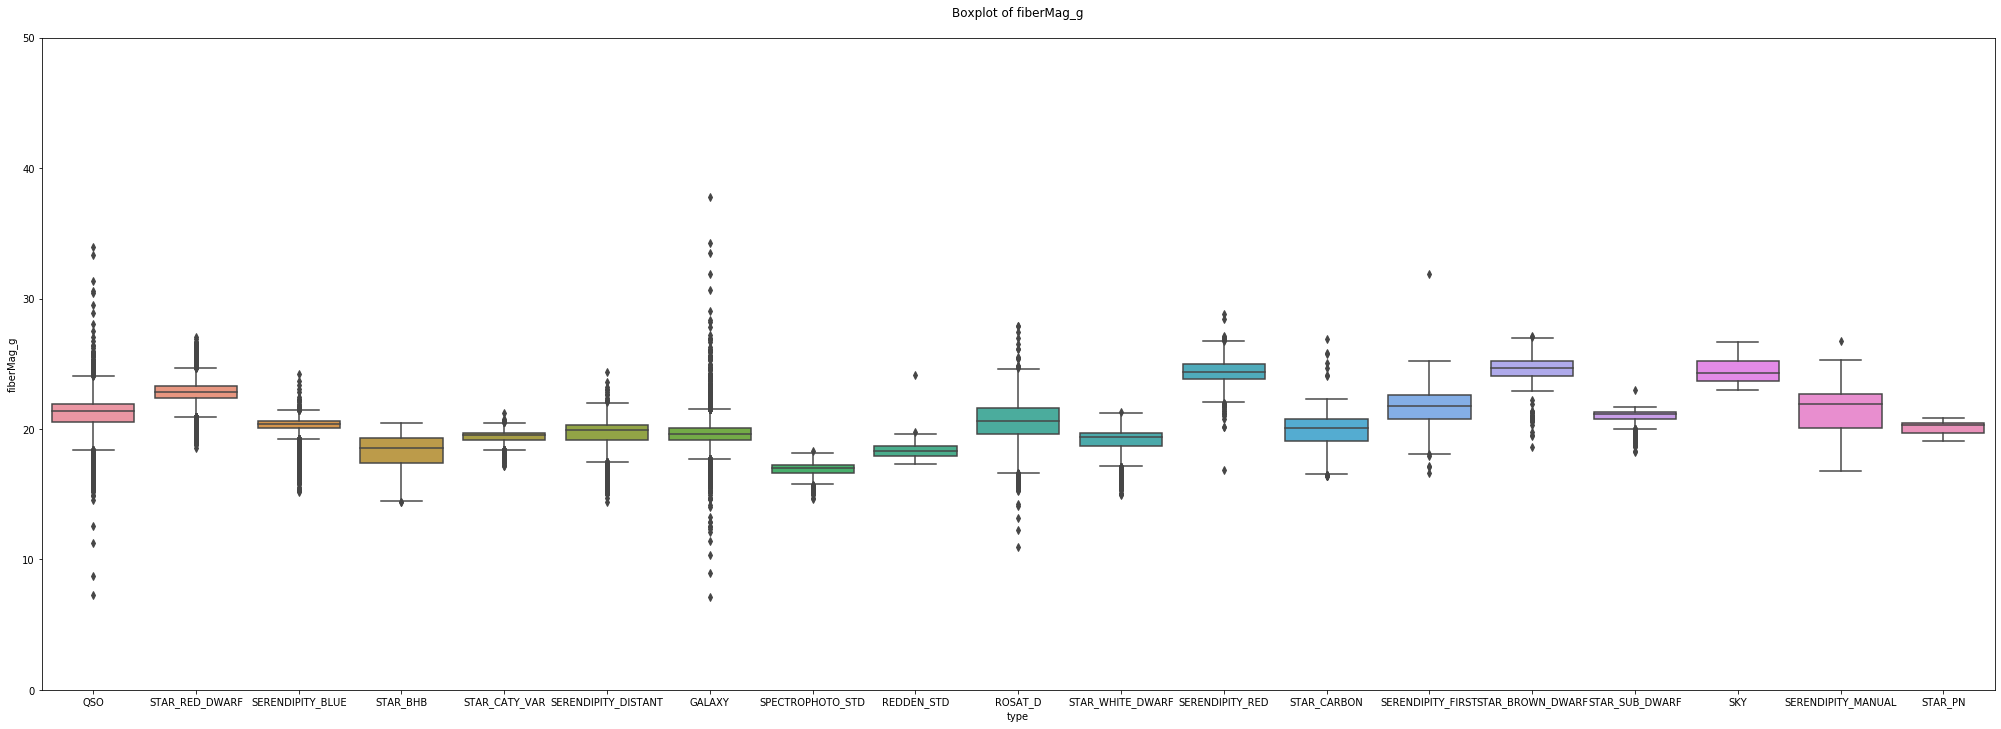

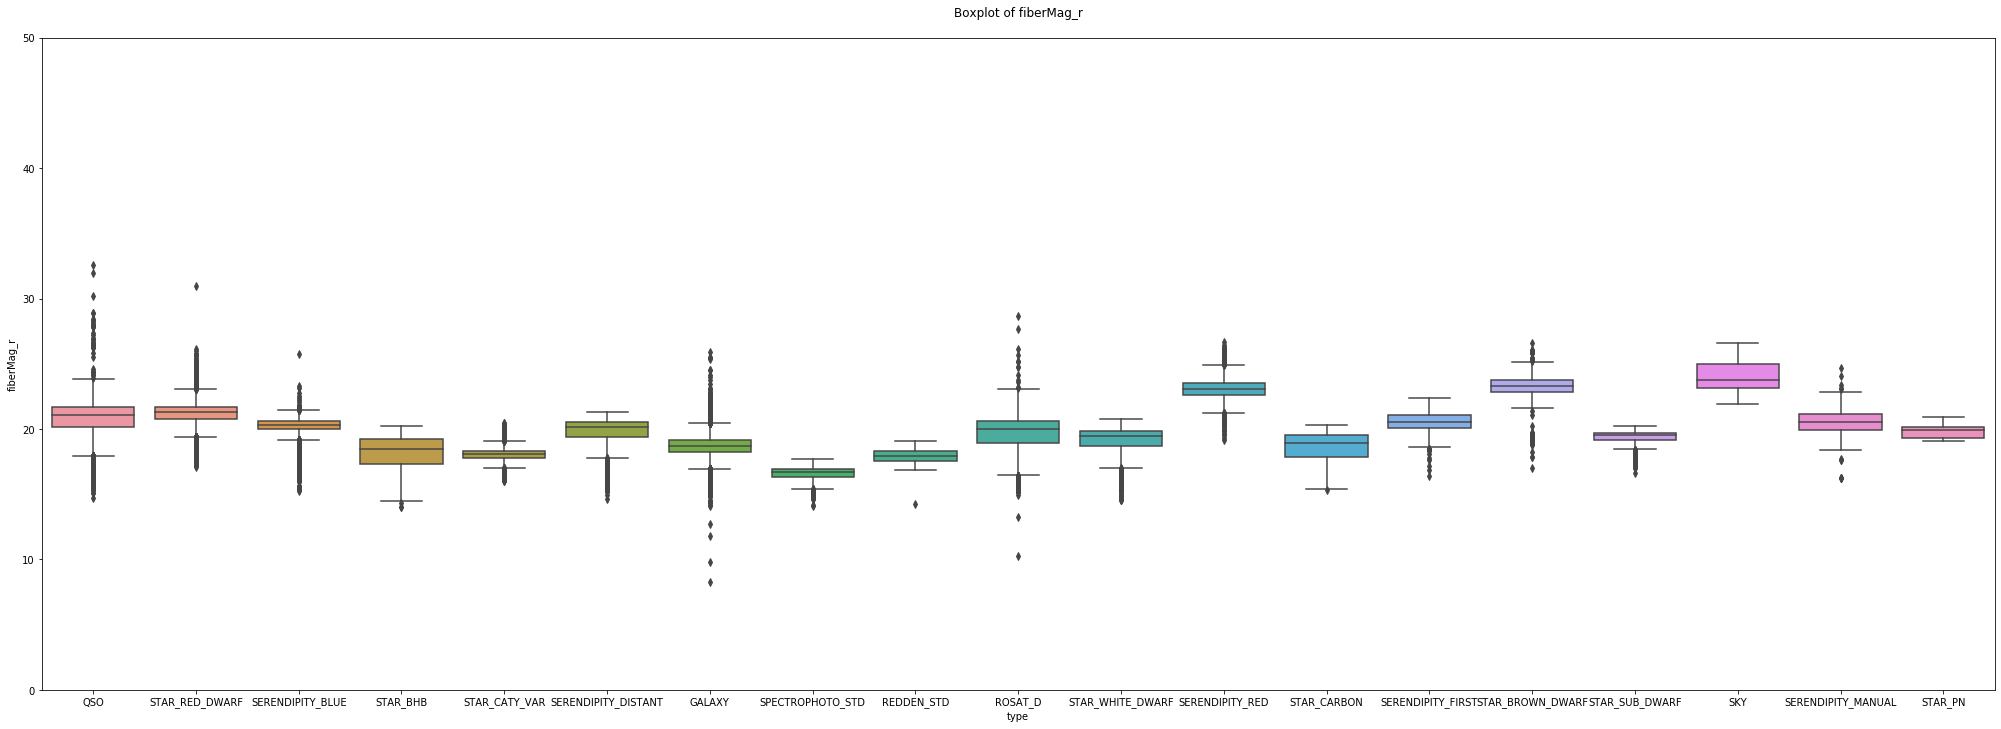

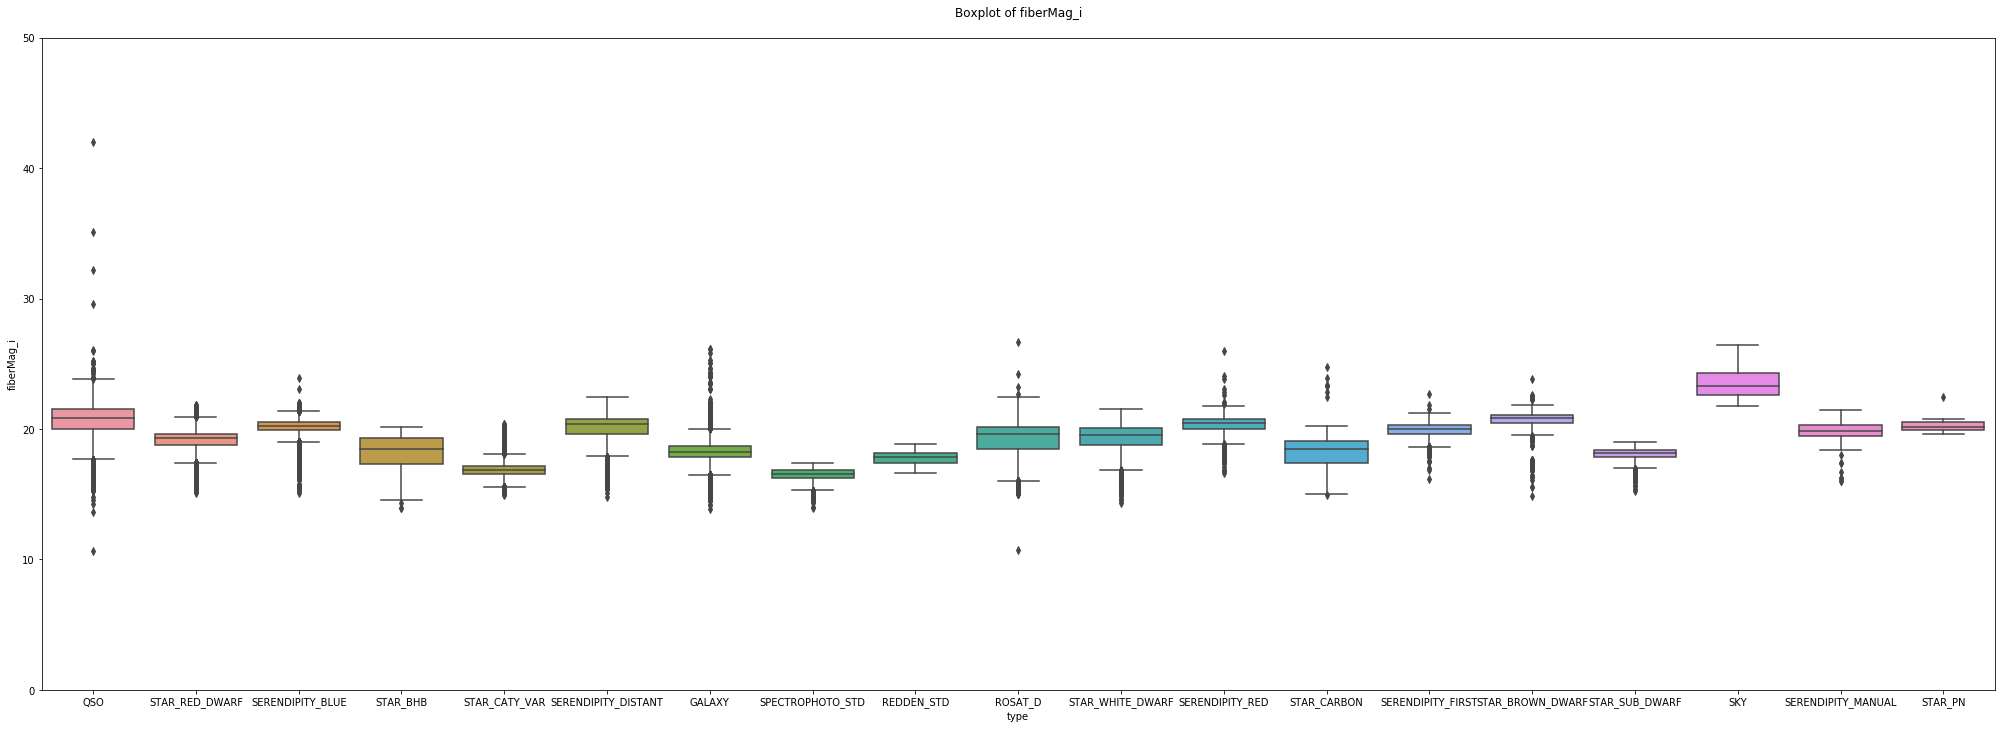

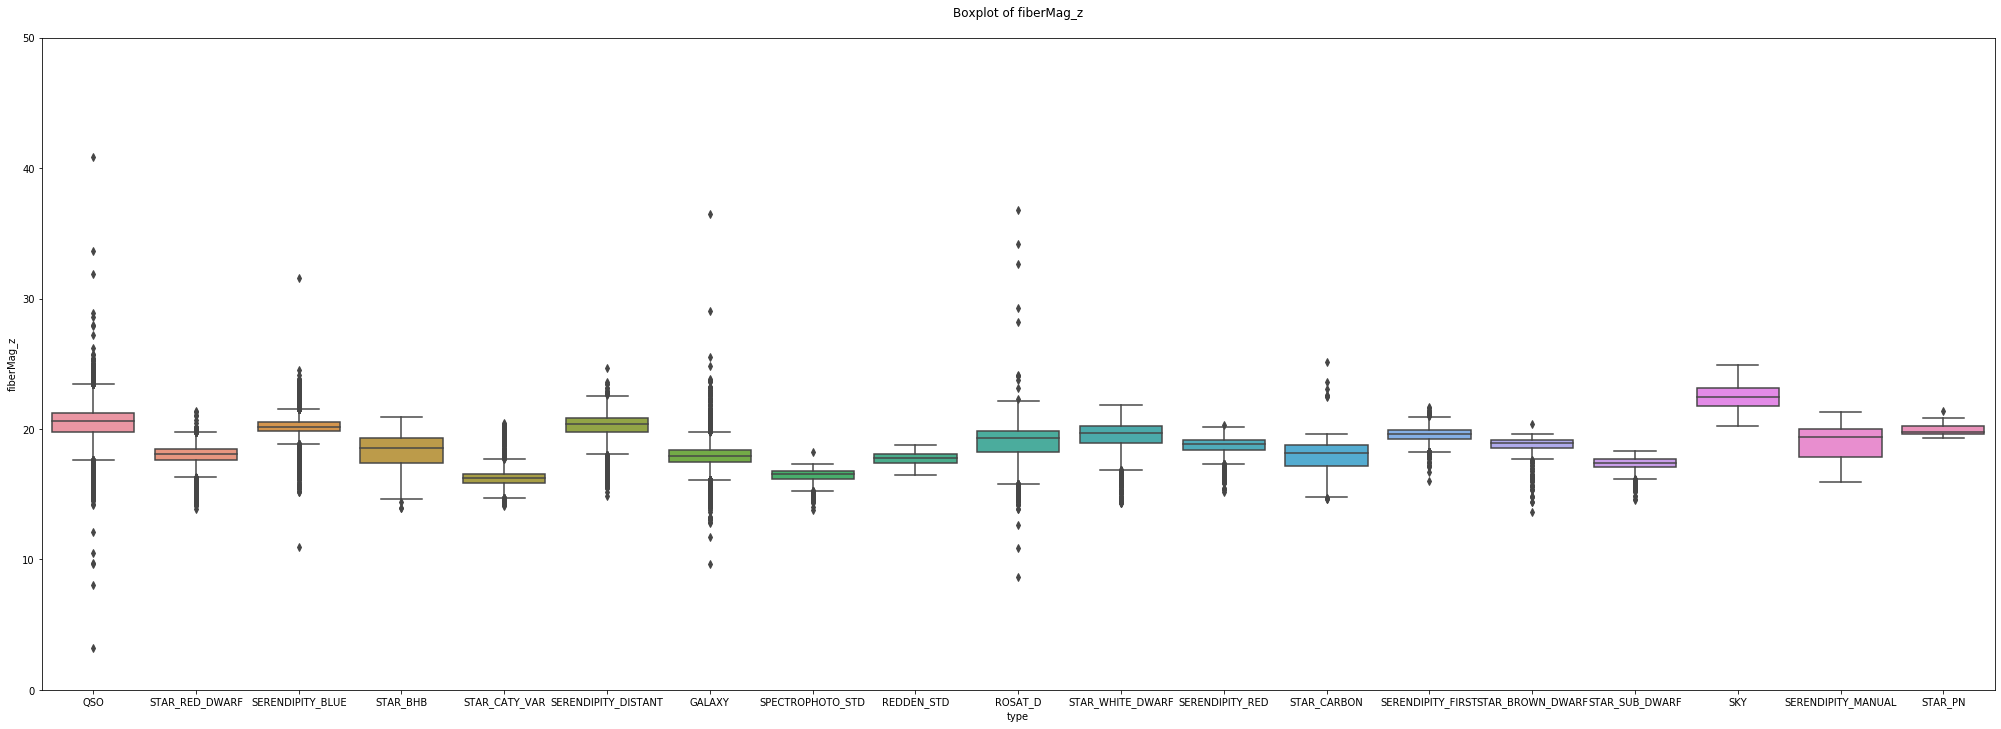

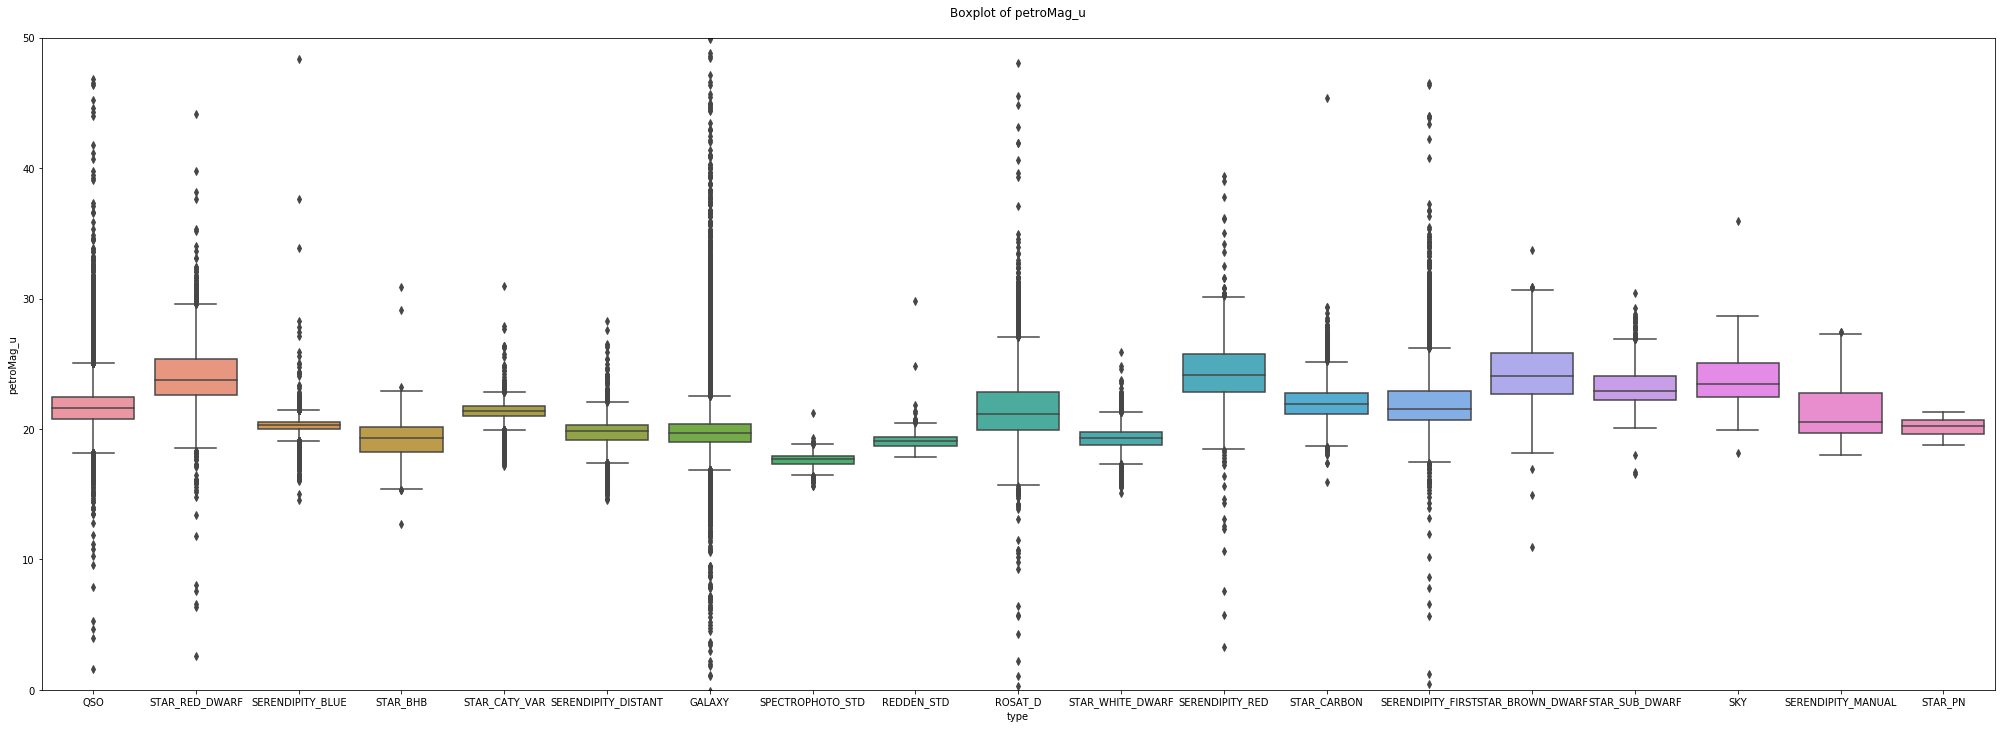

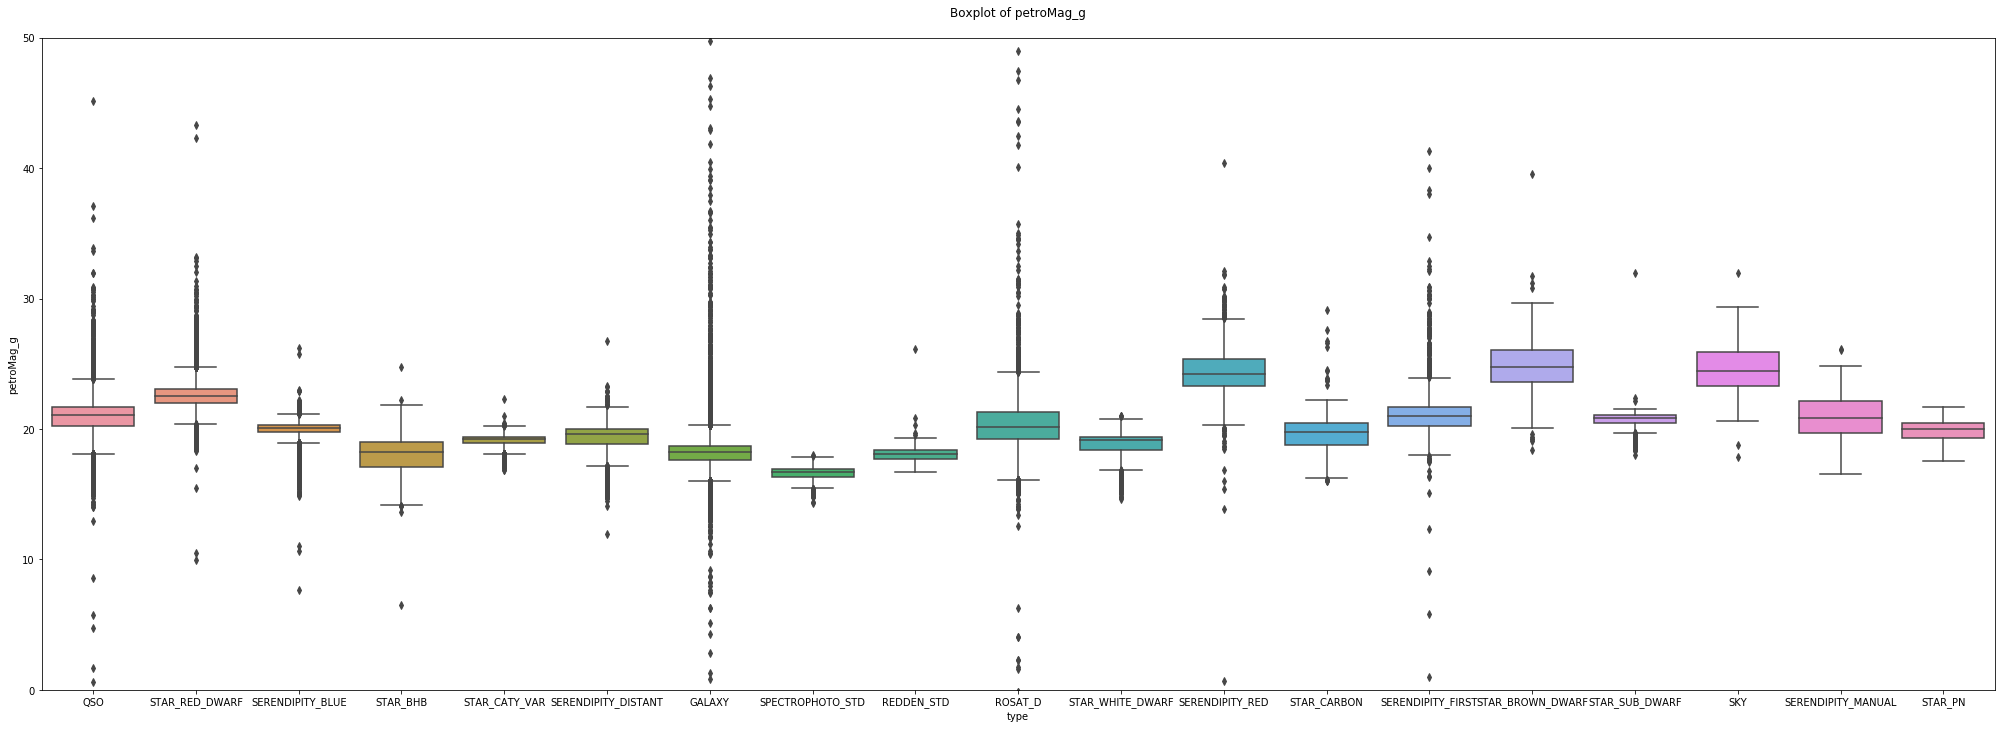

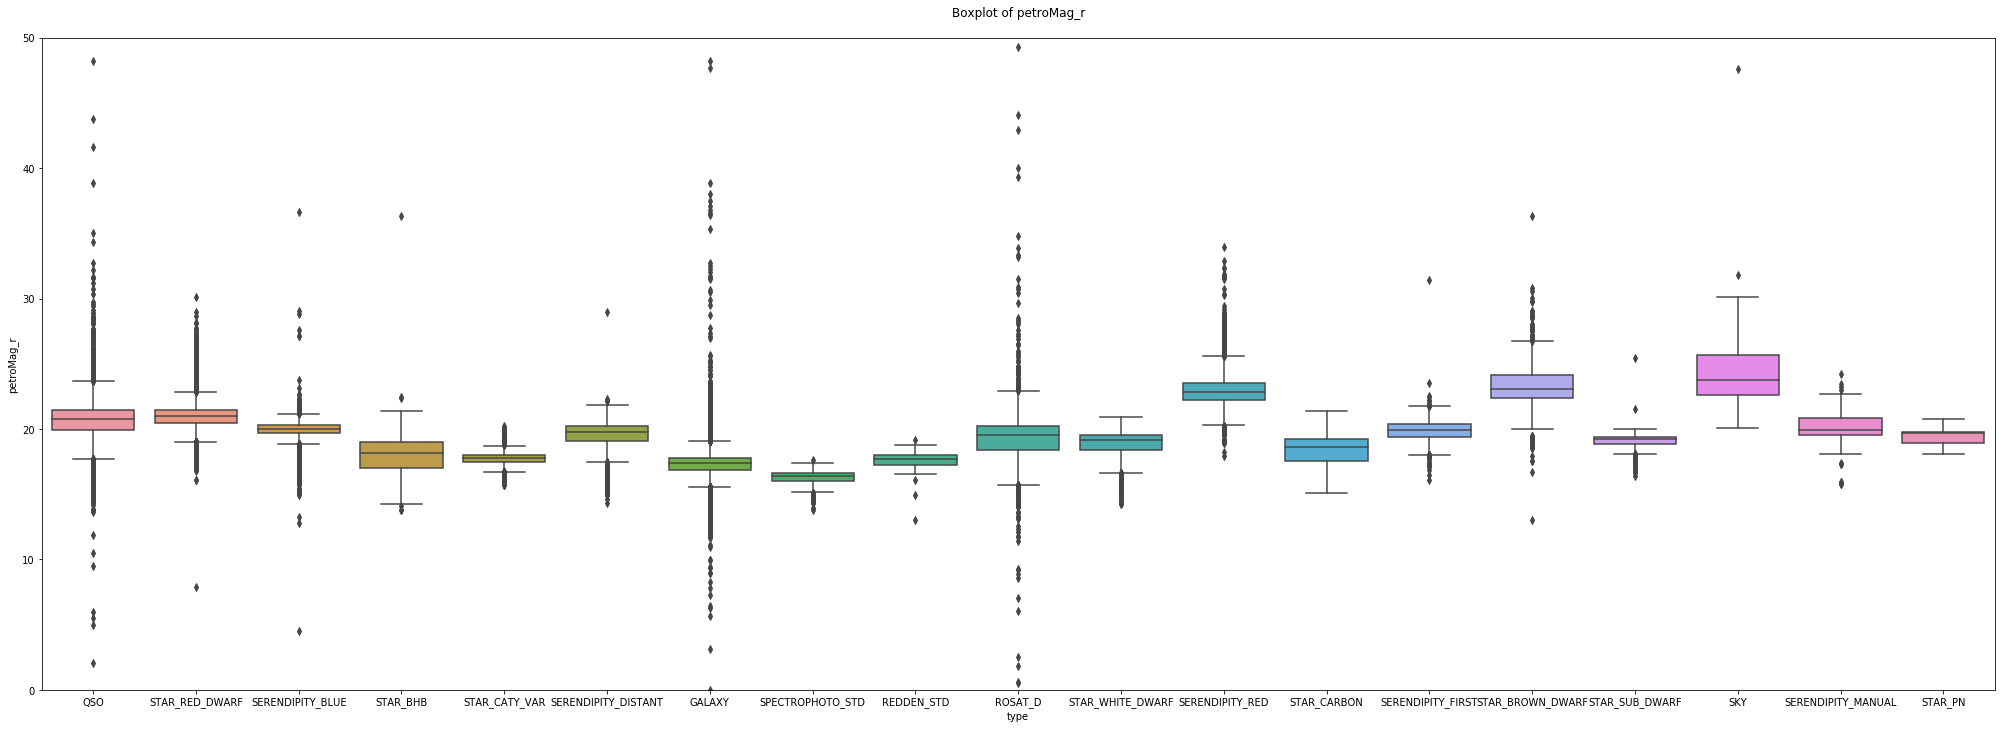

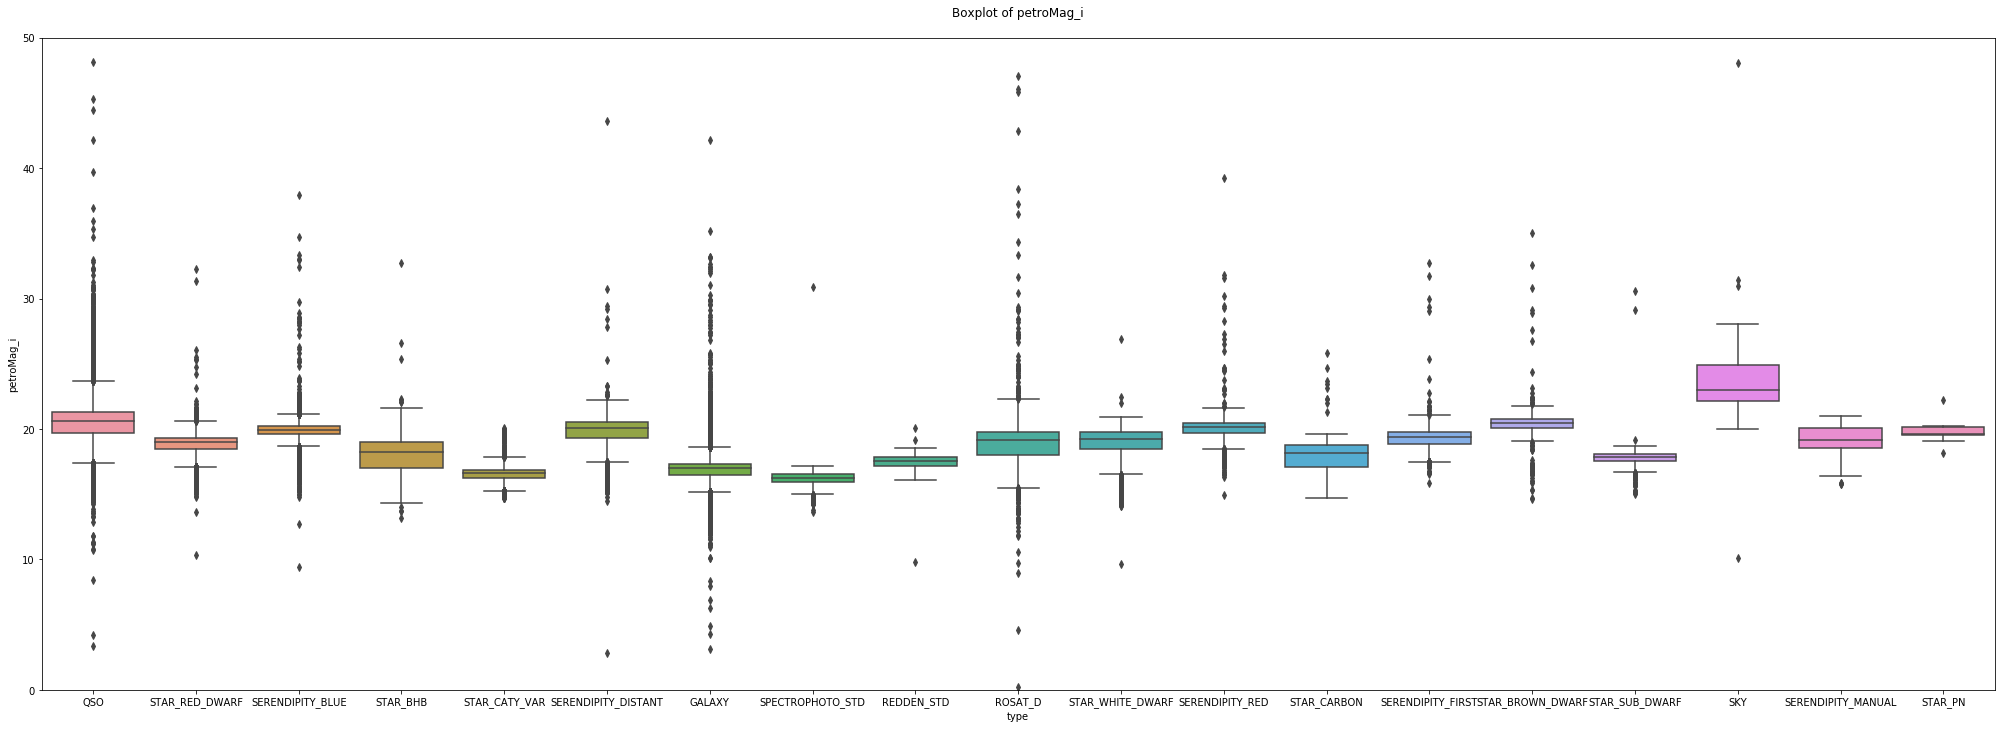

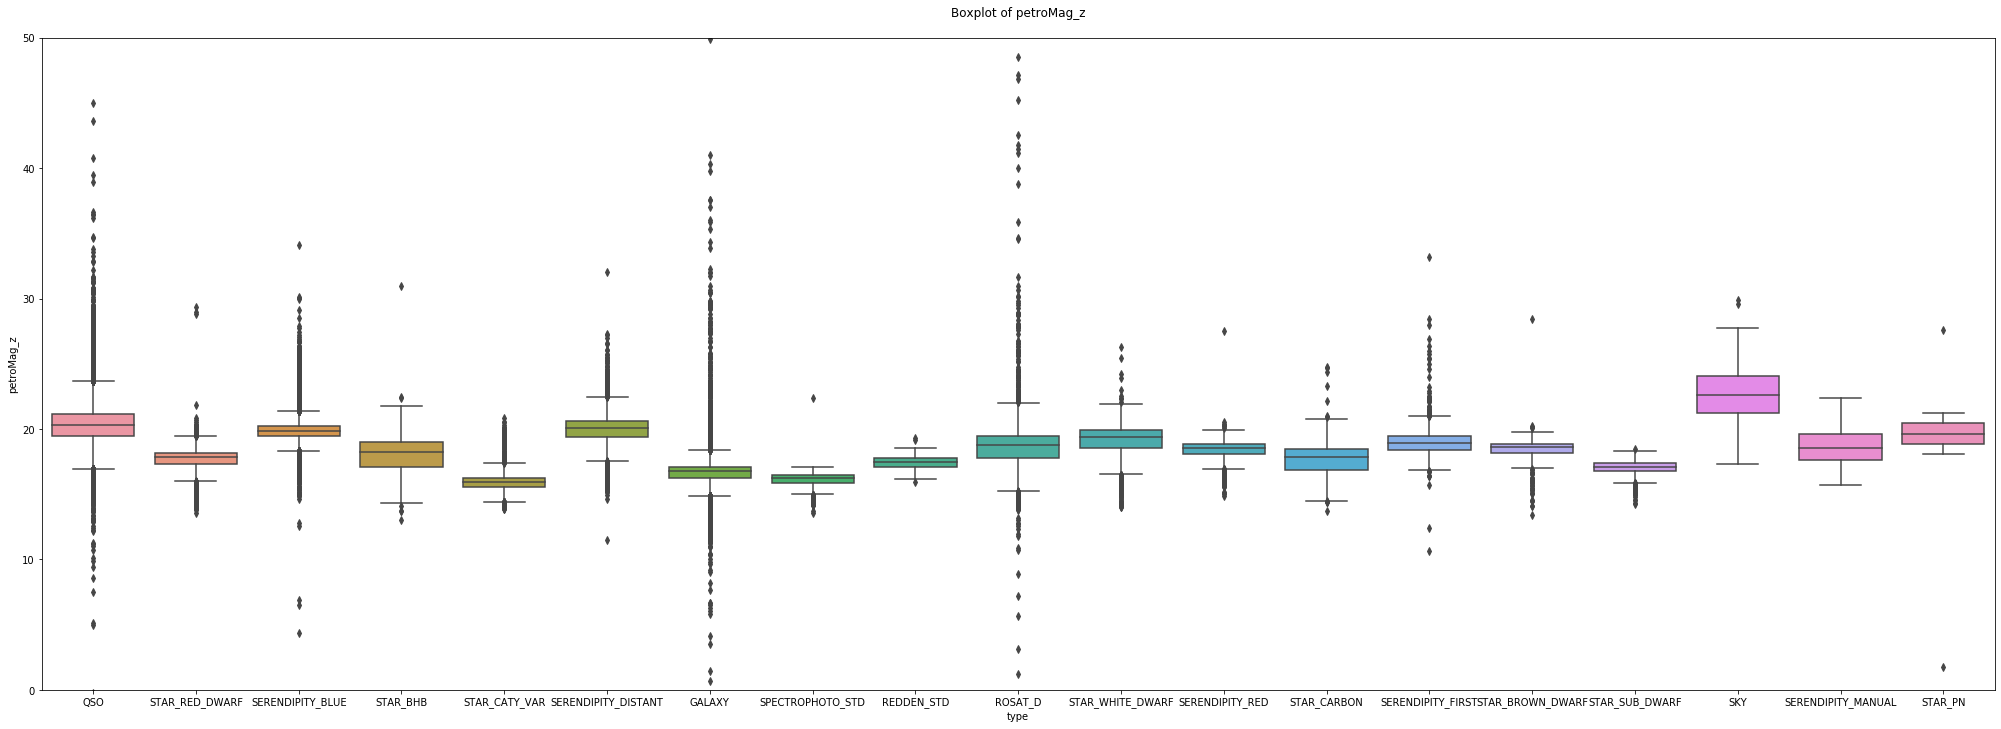

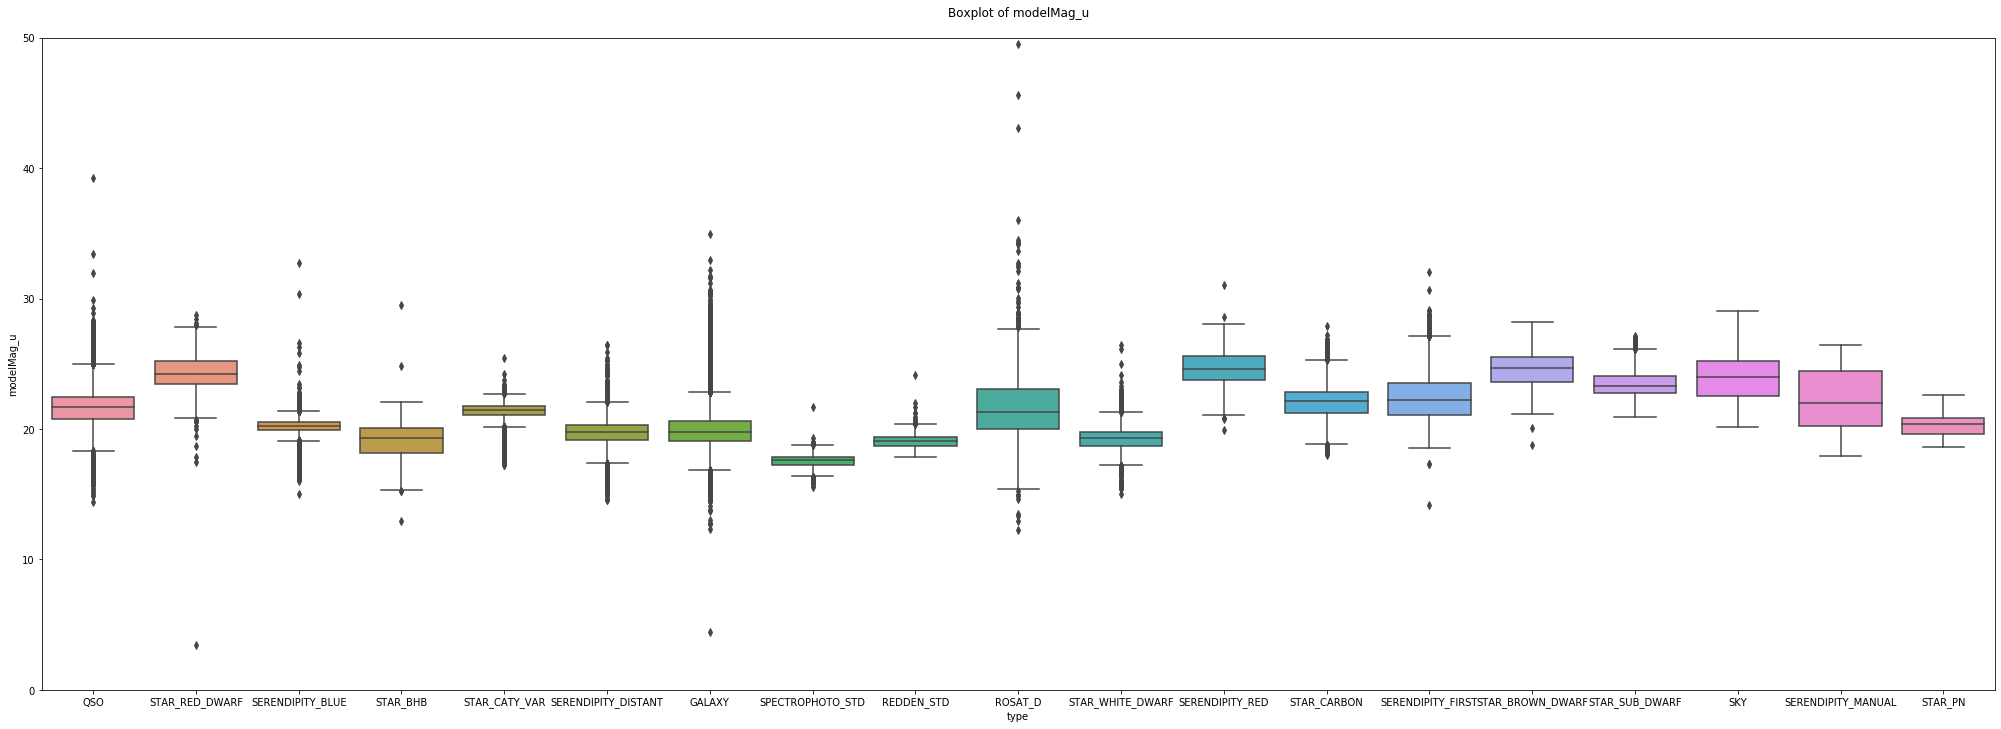

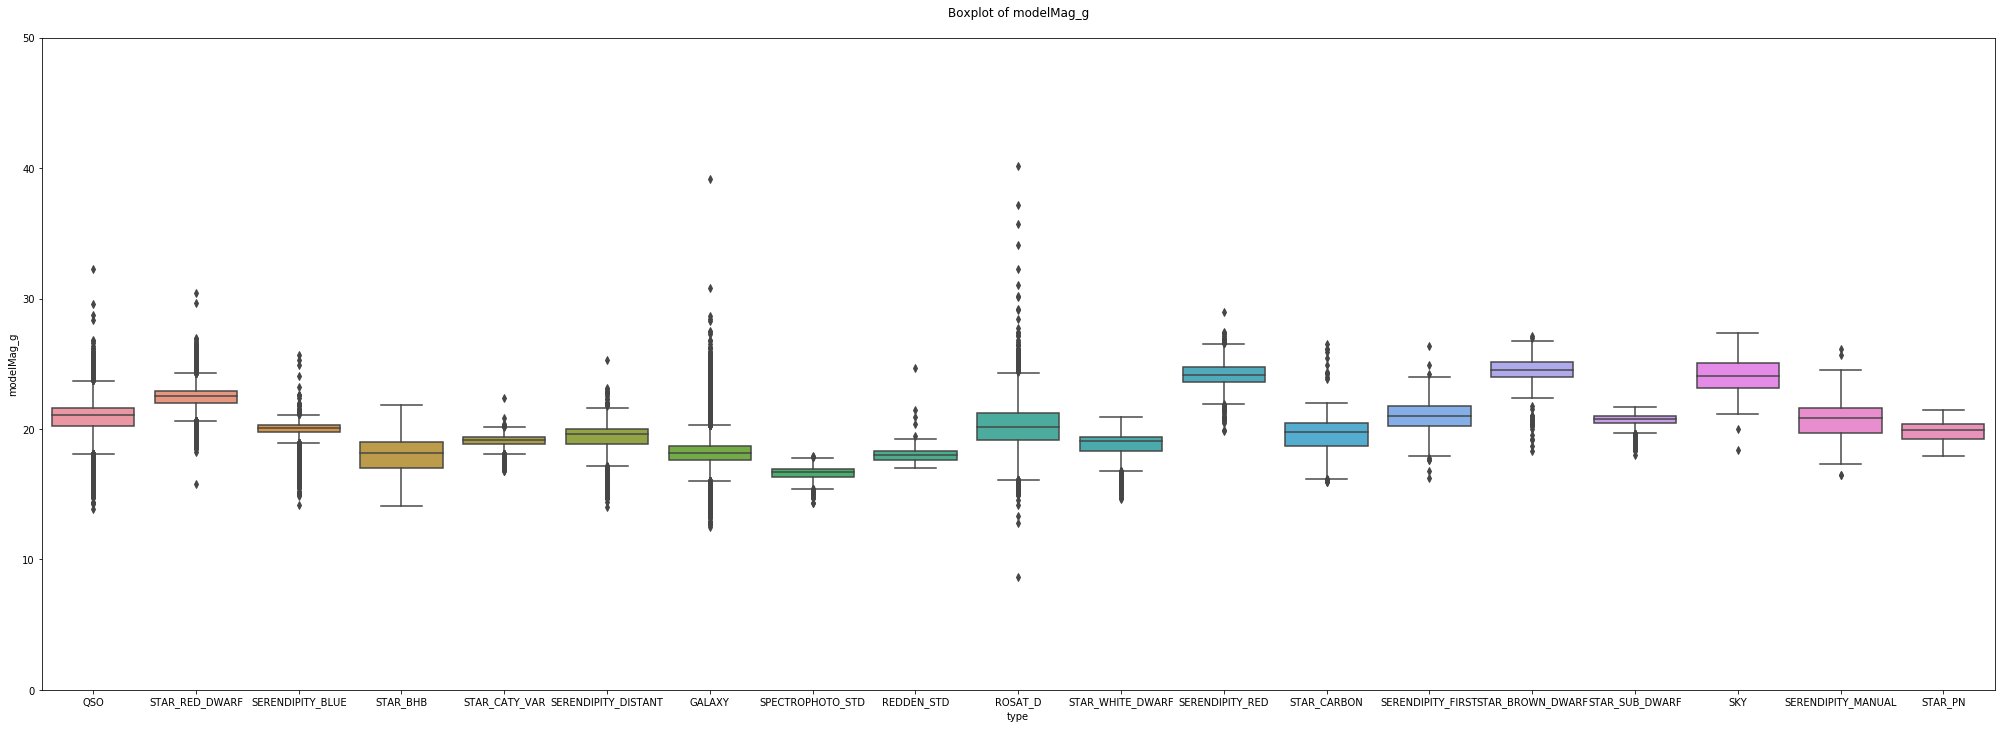

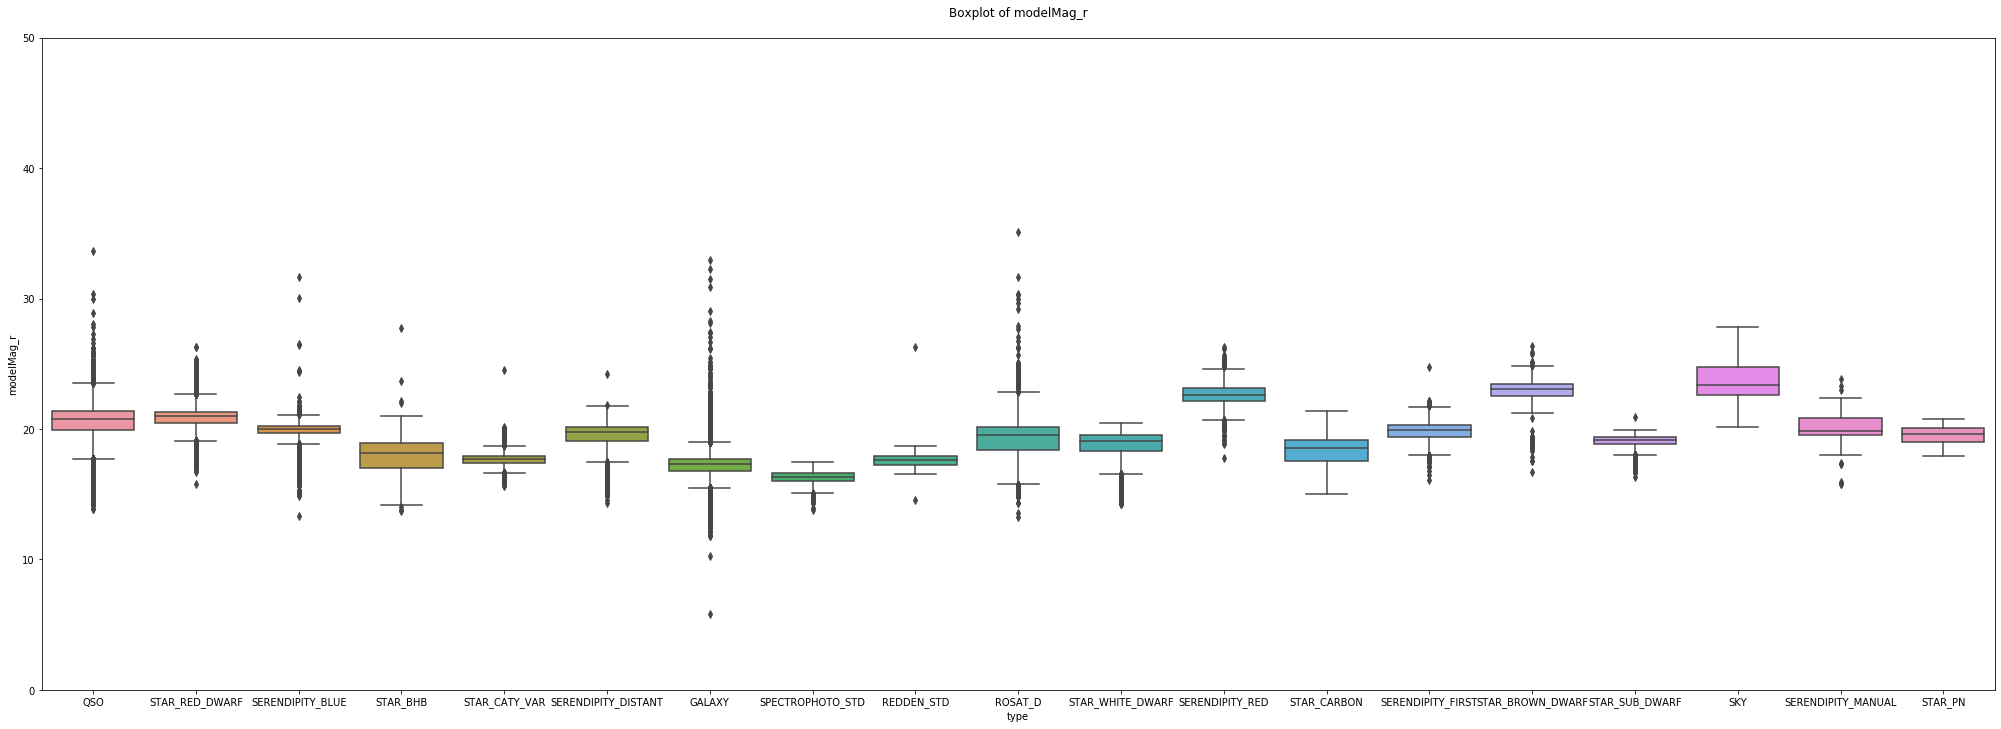

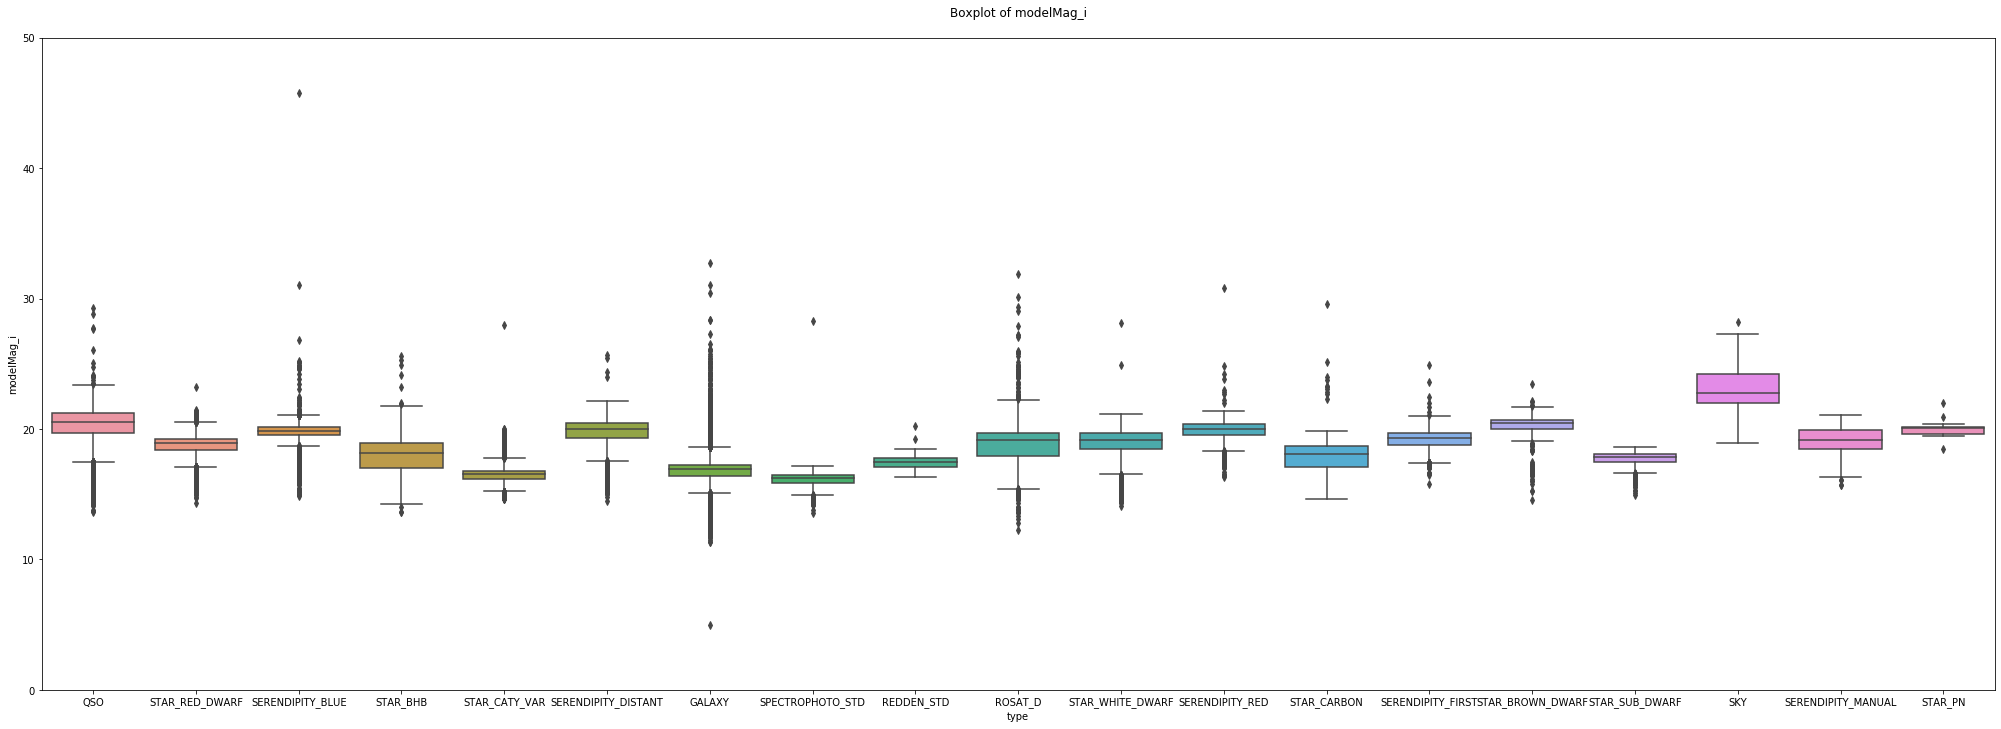

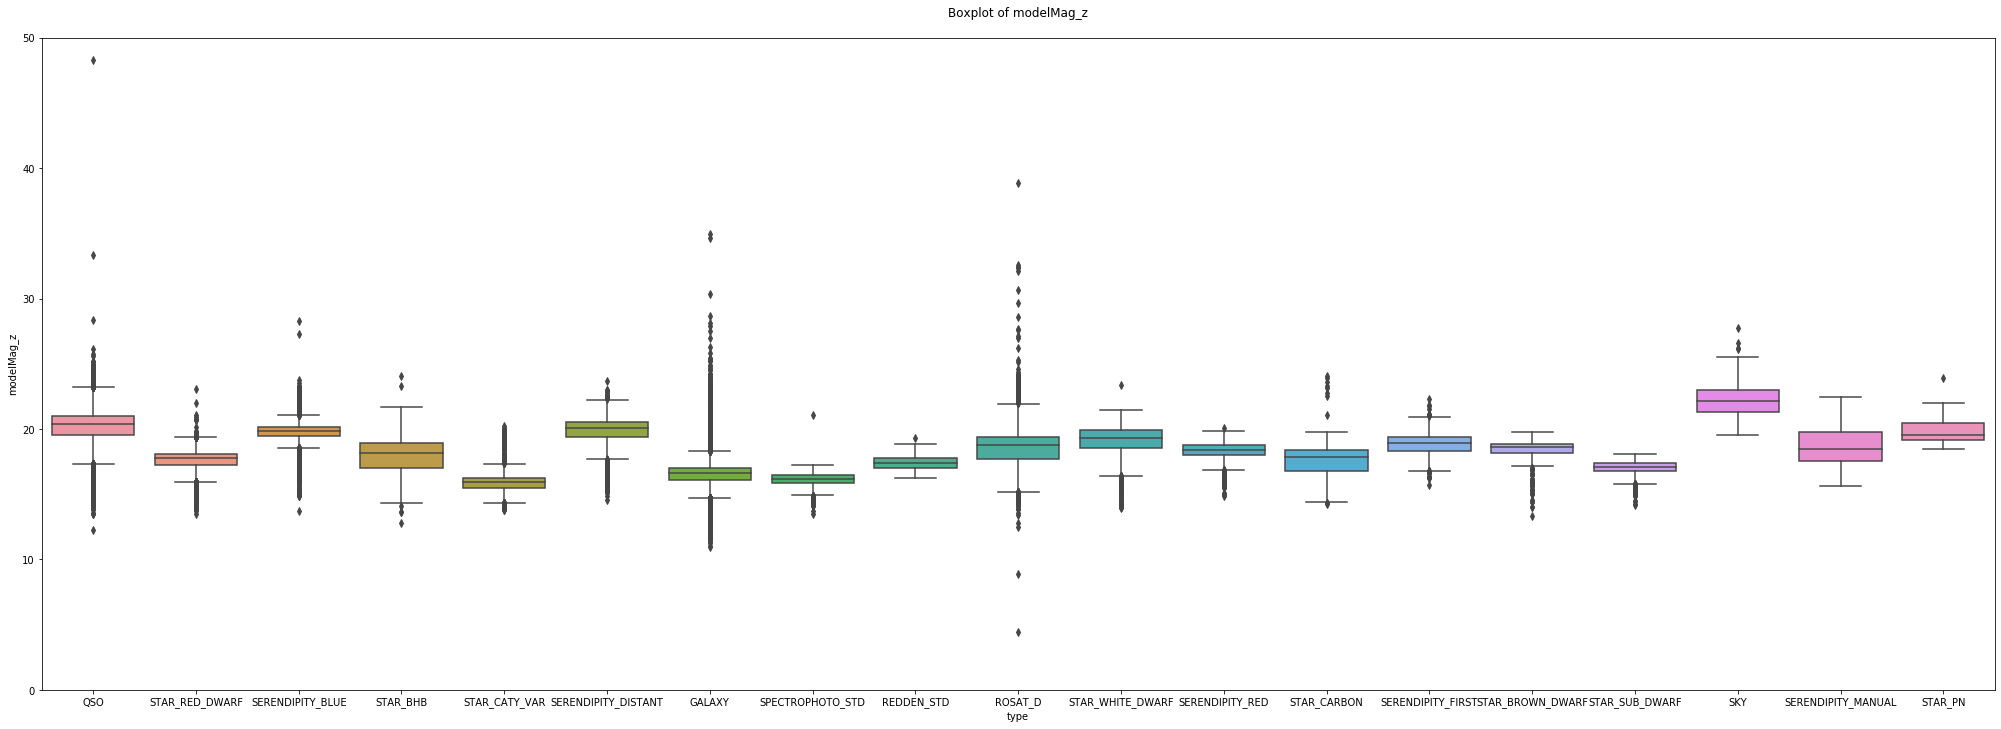

In [16]:
#Boxplot
#매우 outlier가 많다
features_no_id = train.columns[2:]
for col in features_no_id :
    plt.figure(figsize=(35,12))
    sns.boxplot(x=train.type, y=col, data=train).set_ylim(0,50)
    plt.title('Boxplot of %s\n'%col)

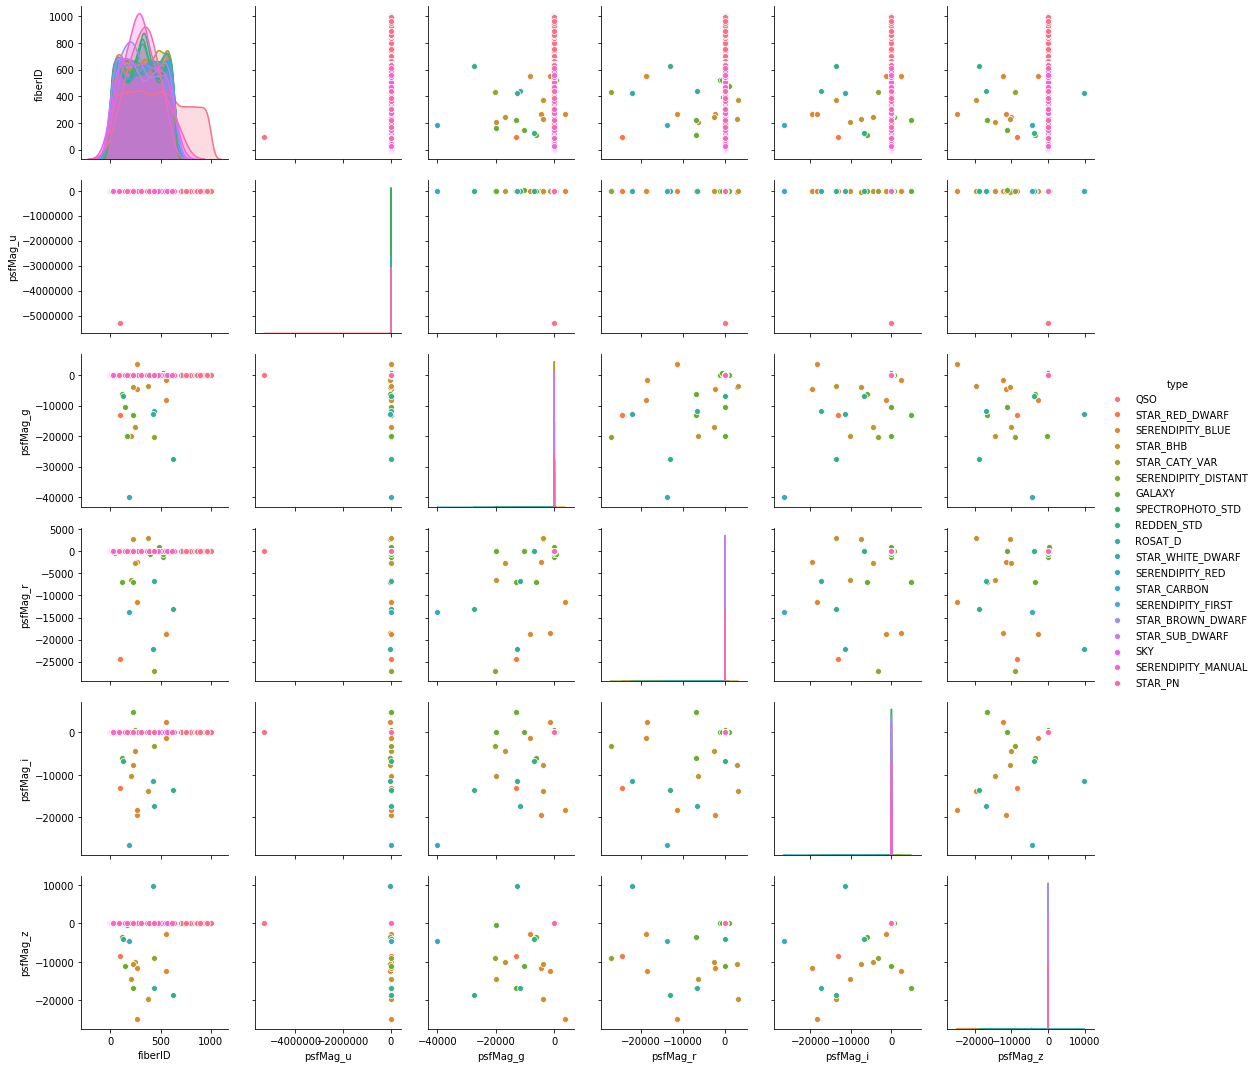

In [57]:
#Pairplot
psfMag = train.iloc[:,:7]
sns.pairplot(psfMag,hue='type')

In [87]:
train['type'].unique() #우리가 구하려는 종속변수 type은 범주형 자료이다. 심지어 상당히 많다...    

array(['QSO', 'STAR_RED_DWARF', 'SERENDIPITY_BLUE', 'STAR_BHB',
       'STAR_CATY_VAR', 'SERENDIPITY_DISTANT', 'GALAXY',
       'SPECTROPHOTO_STD', 'REDDEN_STD', 'ROSAT_D', 'STAR_WHITE_DWARF',
       'SERENDIPITY_RED', 'STAR_CARBON', 'SERENDIPITY_FIRST',
       'STAR_BROWN_DWARF', 'STAR_SUB_DWARF', 'SKY', 'SERENDIPITY_MANUAL',
       'STAR_PN'], dtype=object)

In [88]:
#범주형 자료 numbering하기
type_dict = {j: i for i, j in enumerate(train['type'].unique())} #위 친구를 숫자와 같이 하여 dict 형태로 바꿔준다.
train['type'] = train['type'].replace(type_dict) #해당 사항을 원래 train 데이터의 type에 반영해준다
train
#나중을 대비하여..

,type,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,...,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
id,,,,,,,,,,,,,,,,,,,,,
0,0,601,23.198224,21.431953,21.314148,21.176553,21.171444,22.581309,21.644453,21.657571,...,22.504317,21.431636,21.478312,21.145409,20.422446,22.749241,21.465534,21.364187,21.020605,21.147340
1,0,788,21.431355,20.708104,20.678850,20.703420,20.473229,21.868797,21.029773,20.967054,...,21.360701,20.778968,20.889705,20.639812,20.646660,21.492955,20.758527,20.753925,20.693389,20.512314
2,0,427,17.851451,16.727898,16.679677,16.694640,16.641788,18.171890,17.033098,16.999682,...,17.867253,16.738784,16.688874,16.744210,16.808006,17.818063,16.697434,16.641249,16.660177,16.688928
3,0,864,20.789900,20.040371,19.926909,19.843840,19.463270,21.039030,20.317165,20.217898,...,20.433907,19.993727,19.985531,19.750917,19.455117,20.770711,20.001699,19.889798,19.758113,19.552855
4,1,612,26.454969,23.058767,21.471406,19.504961,18.389096,25.700632,23.629122,21.742750,...,25.859229,22.426929,21.673551,19.610012,18.376141,24.877052,23.147993,21.475342,19.487330,18.375655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199986,0,568,20.630780,20.437920,20.050756,20.020974,19.959646,20.948519,20.726709,20.311562,...,20.836400,20.536338,20.126561,20.102815,19.796722,20.783295,20.326879,20.014046,20.061940,19.862513
199987,6,362,25.283695,22.807243,21.069792,20.187531,19.595598,26.677671,22.818723,20.786120,...,28.895442,22.250489,20.091693,18.985791,18.803354,26.921903,21.952440,19.776321,18.990039,18.528306
199988,1,146,23.609826,21.902709,20.330747,18.457535,17.326771,24.320816,22.287946,20.711737,...,25.982378,22.132993,20.329624,18.507337,17.418521,24.503460,21.897599,20.420524,18.443126,17.331724


In [ ]:
요약
1. type 별로 그 수가 매우 비대칭구조이다. 
QSO, STAR_RED_DWARF, SERENDIPITY_BLUE가 주류를 이루고 있는 반면, SKY, SERNDIPITY_MANUAL, STAR_PN은 거의 안보임
2. 변수중에서 ultraviolet이 조금 이상하다. 특히 psfMag_u, fiberMag_u, petroMag_u는 몇몇의 outlier를 제외하고는 데이터가 거의 동일하며,
상관계수도 상당히 높다. 다만 model_u는 제외한다. 또한, 분포도를 그렸을 때 정규성조차 띄지 않는다. 매우 혼란스럽다.
3. fiberID의 경우에는 유일하게 int type으로 형성되어 있으며 1~1000까지의 값이 존재한다. 여기에 다른 변수와는 다른 유의미한 무언가가 존재할 것 같다.
4. fiberID를 제외하곤 모든 변수들의 boxplot이 0에서 50 사이에 그려진다. 근데 outlier가 뜬금없게 막 -10000000 요런게 많이 보인다. 속상하다.
5. type 별로 묶은 후에 변수별로 묶어봤는데 유의미한 무언가를 찾아내기는 힘들었다.
6. 정리하자면, u를 제외한 변수들은 대부분 random? 하다고 보면된다. u는 특이하다. ID는 다른 변수와는 다른 특징을 지니고 있다. type은 수가 일정치 않다. 